Please find below the Project for Featurization Model selection and Tuning course. This is an individual assignment. Kindly submit it before it's deadline.

Predict House Prices

Dataset Info – kc_house_data.csv.zipView in a new window

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

19 house features plus the price and the id columns, along with 21613 observations.

Column Info –
------------------

* id - Unique ID for each home sold 

* date - Date of the home sale 

* price - Price of each home sold 

* bedrooms - Number of bedrooms 

* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

* sqft_living - Square footage of the apartments interior living space 

* sqft_lot - Square footage of the land space 

* floors - Number of floors 

* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

* view - An index from 0 to 4 of how good the view of the property was 

* condition-How good the condition is ( Overall )
    
        Relative to age and grade. Coded 1-5.

        1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

        2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

        3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

        4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

        5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 


* grade-overall grade given to the housing unit, based on King County grading system
     
         An index from 1 to 13, where 
         - 1-3 falls short of building construction and design, 
         - 7 has an average level of construction and design, and 
         - 11-13 have a high quality level of construction and design.

        Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

        1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

        4 Generally older, low quality construction. Does not meet code.

        5 Low construction costs and workmanship. Small, simple design.

        6 Lowest grade currently meeting building code. Low quality materials and simple designs.

        7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

        8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

        9 Better architectural design with extra interior and exterior design and quality.

        10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

        11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

        12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

        13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 
    
* sqft_above - The square footage of the interior housing space that is above ground level 

* sqft_basement - The square footage of the interior housing space that is below ground level 

* yr_built - The year the house was initially built 

* yr_renovated - The year of the house’s last renovation 

* zipcode - What zipcode area the house is in 

* lat - Lattitude 

* long - Longitude 

* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors  


Steps –
----------
1. Import libraries and read the dataset.
2. Explore Data Analysis. Find out how one variable related to other and distributions of data.
3. State your insights.
4. Build a linear regression model to predict the house prices
5. Try to find out important features or create new features to improve the performance for your model.
6. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

PS: - You can change the order of steps or add additional steps to figure out the best solution.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

## Common Functions -- START

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: skyblue' if v else '' for v in is_max]

In [3]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: white' if v else '' for v in is_min]

In [4]:
def get_IQR(dataset, field):
    """
    Calculates and returns IQR, Lower Whisker and Upper Whisker
    """
    Q1 = np.quantile(dataset[field], 0.25)
    Q3 = np.quantile(dataset[field], 0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return IQR, lower, upper

In [5]:
def grab_outliers_IQR(dataset, field):
    _, lower, upper = get_IQR(dataset, field)
    return dataset[(dataset[field] < lower) | (dataset[field] > upper)]

In [6]:
def grab_outliers_ZScore(dataset, field):
    z = stats.zscore(dataset[field])
    return dataset[z > 3] 

In [7]:
def drawDistplot(df, name, color,  fig_size=(10,8), legend_loc='upper right', background_style='darkgrid', kde=True, hist=False, bins=None):
 
    skewness_kurtosis = ''
    
    sns.set(style=background_style)
    plt.figure(figsize=(15,8))
    
    s_k = name + ' --> skewness = ' + str(df.skew()) + ', kurtosis = ' + str(df.kurtosis()) + '\n'
    skewness_kurtosis = skewness_kurtosis + s_k
    ax=sns.distplot(df, hist=hist, kde=kde, label=name , color=color, bins=bins)
    ax.axvline(df.mean(),   color=color, linestyle='--', label='%s, Mean = %0.2f' %(name, df.mean()))
    ax.axvline(df.median(), color=color, linestyle='-',  label='%s, Median = %0.2f' %(name, df.median()))

    plt.legend(loc="upper right")
    plt.show()
    plt.close()
    print(skewness_kurtosis)



In [8]:
def drawCountPlot(x_axis=None, y_axis=None, figsz = (15,8), rotate_ticks=0, background_style='darkgrid' ,orderby=None, x_label=None, y_label=None):
    ''' 
    eg.
    drawCountPlot(y_axis=df['car_brand'], y_label='Car Brand', background_style='darkgrid', orderby=df['car_brand'].value_counts().index)
    '''
    sns.set(style=background_style)
    plt.figure(figsize=figsz)
    plt.xticks(rotation=rotate_ticks)
    ax = sns.countplot(x=x_axis, y= y_axis, order=orderby)
    ax.set(xlabel= x_label, ylabel=y_label)
    plt.show()
    plt.close()

## Common Functions -- END

# [A] EDA, Clean Data, Transform Data, Visualization of Data

In [9]:
houses = pd.read_csv("kc_house_data.csv", parse_dates=['date'])
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [11]:
# All the columns have appropriate data-types and all rows have non-null values. 
# None of the columns are missing any values
houses.shape

(21613, 21)

In [12]:
# Let's drop column 'id', as is just a sequence-number
houses = houses.drop('id', axis=1)

In [13]:
# Let's check if there are any duplicate records
houses[houses.duplicated(keep='first')]
# Cool, so there aren't any duplicates

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Univariate Analysis

### date

In [14]:
# Let's create a few more columns from date column for fetching more meaningful information
houses['year_month'] = houses['date'].map(lambda value: value.strftime('%Y_%m'))
houses['year'] = houses['date'].dt.year
houses['month'] = houses['date'].dt.month
houses['day_of_month'] = houses['date'].dt.day

houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_month,year,month,day_of_month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014_10,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014_12,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015_02,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014_12,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015_02,2015,2,18


In [15]:
# Let's check which year has more no of houses sold
houses['year'].value_counts()
# In the given interval (May 2014 to May 2015) there were more months falling in year 2014 as compared to 2015. 
# Hence the numbers are more for year 2014.

2014    14633
2015     6980
Name: year, dtype: int64

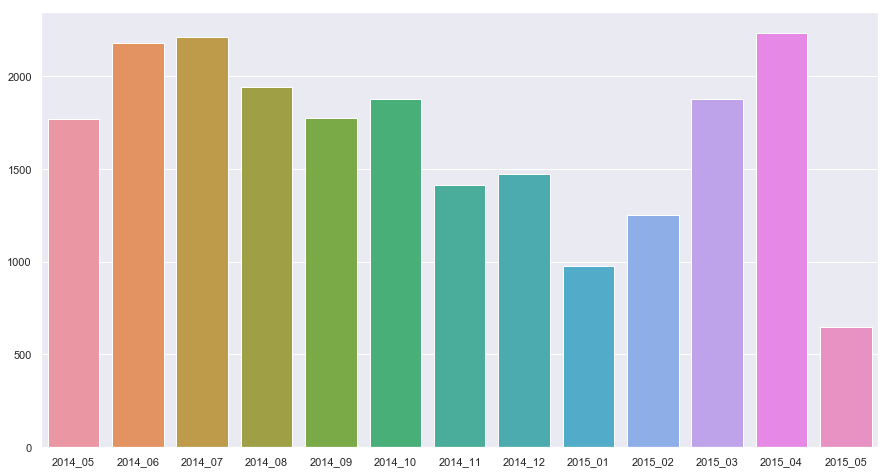

In [16]:
# Let's understand which month in the given period had more houses sold
drawCountPlot(houses['year_month'])

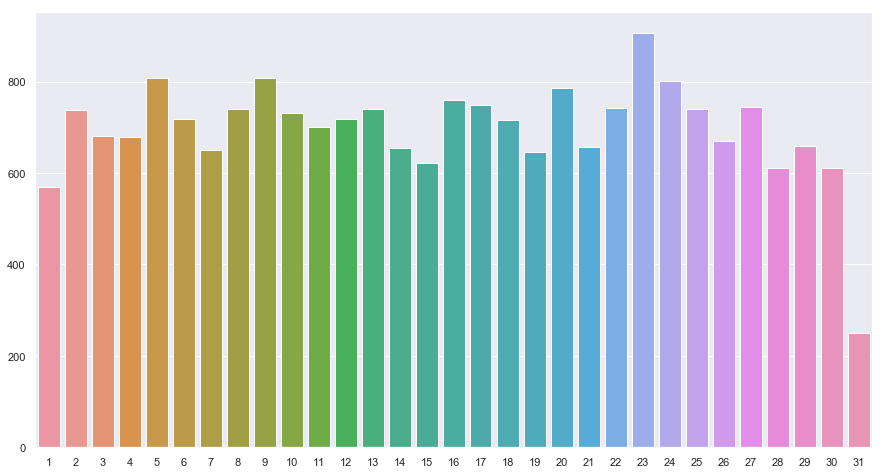

In [17]:
# Is there a preference for any particular day when the houses are sold the most
drawCountPlot(houses['day_of_month'])
# Seems like people have high preferene of selling houses on 23rd day of the month

In [18]:
bins = [1, 5, 10, 15, 20, 25, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '25-31']
houses['day'] = pd.cut(houses['day_of_month'], bins, labels=labels ) 
(houses['day'].value_counts(normalize=True)*100).sort_values(ascending=False)
# So more houses are sold towards the end of the month

21-25    18.280745
16-20    17.377875
6-10     17.339859
25-31    16.859913
11-15    16.337198
1-5      13.804410
Name: day, dtype: float64

## Price

In [19]:
houses.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day_of_month    -0.014670
zipcode         -0.053203
Name: price, dtype: float64

So price has high correlation with 
1. sqft_living
2. grade
3. sqft_above
4. sqft_living15
5. bathrooms

and Medium correlation with 

6. view
7. sqft_basement
8. bedrooms
9. lat
10. waterfront
11. floors

and low correlation with rest

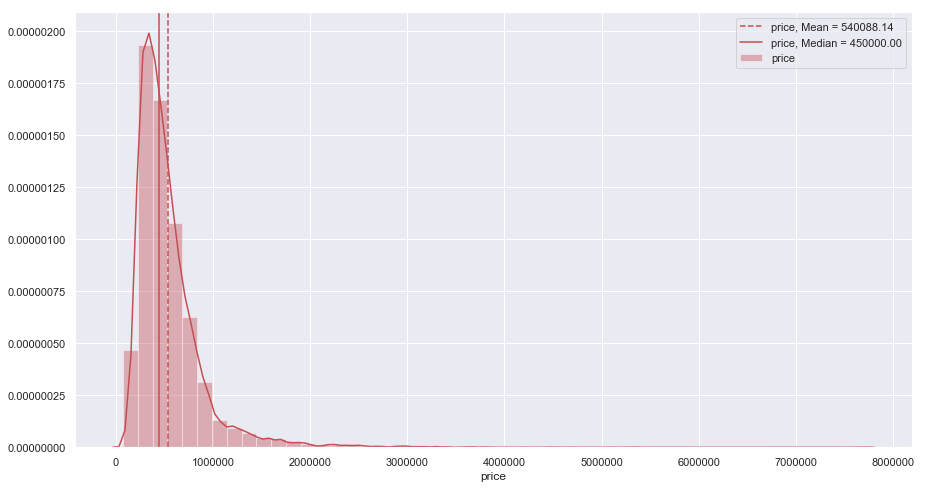

price --> skewness = 4.024069144684712, kurtosis = 34.58554043194243



In [20]:
drawDistplot(houses['price'], 'price', 'r', hist=True)

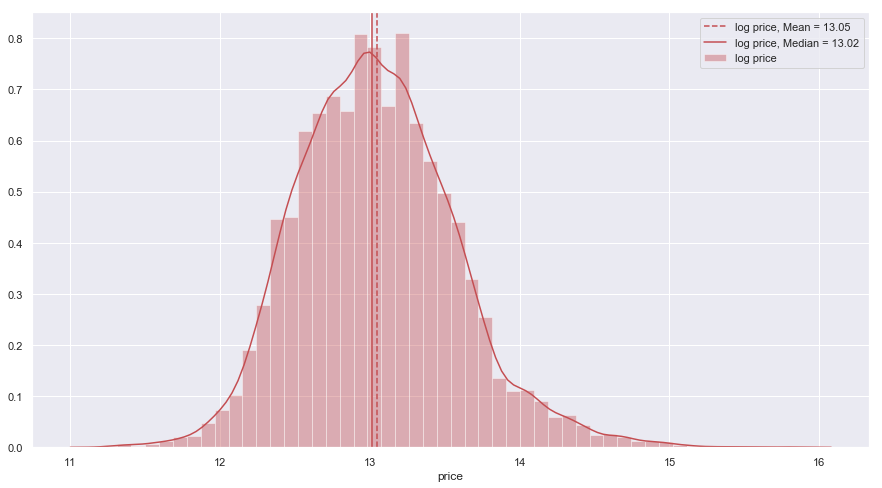

log price --> skewness = 0.42807247557592526, kurtosis = 0.691853952835281



In [21]:
# Let's plot the log distribution of price
drawDistplot(np.log(houses['price']), 'log price', 'r', hist=True)
# It appears pretty normal

## bedrooms

In [22]:
(houses['bedrooms'].value_counts(normalize=True)*100).sort_index()
# So most of the houses have either 3 or 4 bedrooms

0      0.060149
1      0.920742
2     12.770092
3     45.454125
4     31.841947
5      7.407579
6      1.258502
7      0.175820
8      0.060149
9      0.027761
10     0.013881
11     0.004627
33     0.004627
Name: bedrooms, dtype: float64

In [23]:
# From above, it appears that there are some luxury-class houses as well. eg. houses with bedrooms above 8.
#Let's inspect them furthere.
houses[houses['bedrooms'] >= 9][['price', 'grade', 'sqft_living', 'bedrooms', 'yr_built']].sort_values(
    by=['bedrooms','price','grade',], ascending=False)

,price,grade,sqft_living,bedrooms,yr_built
15870,640000.0,7,1620,33,1947
8757,520000.0,7,3000,11,1918
13314,1148000.0,9,4590,10,2008
19254,660000.0,7,2920,10,1913
15161,650000.0,7,3610,10,1958
16844,1400000.0,11,4620,9,1915
6079,1280000.0,8,3650,9,1915
18443,934000.0,7,2820,9,1918
4235,700000.0,7,3680,9,1908
4096,599999.0,7,3830,9,1938


In [24]:
houses.groupby('bedrooms')['price', 'sqft_living', 'sqft_above'].agg(['min', 'max', 'median']).sort_values(by='bedrooms', ascending=False).style.background_gradient(axis=0)

Observations:
--------------------

- Intuitively, 33 bedroom houses built area and plot size seem too less for 33 bedrooms. It can be mistake. We will check for the average bedroom numbers for similar area and plot size in the dataset.
- For 9, 10 or 11 bedroom houses, either they are too old (it could happen that in old time the bedrooms were too small) or they have enough space. So we don't want to impute them.

In [25]:
#index 15870 -> 33 bedrooms -> sqft_living = 1620, sqft_living15 = 1330
# From above numbers, we can see that for 1620 sqft, it is mostly a 3-bedroom house.
# so, let's correct the value for bedrooms in this case.

houses.iloc[15870, houses.columns.get_loc('bedrooms')] = 3

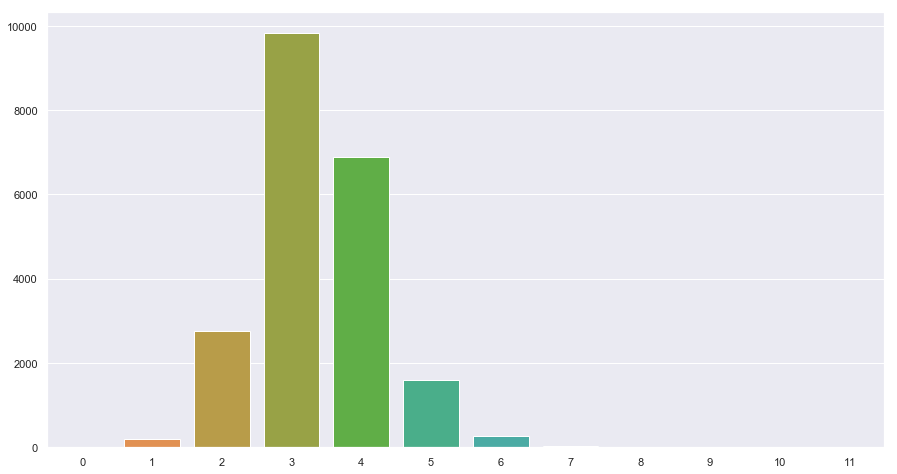

In [26]:
drawCountPlot(houses['bedrooms'])

## bathrooms

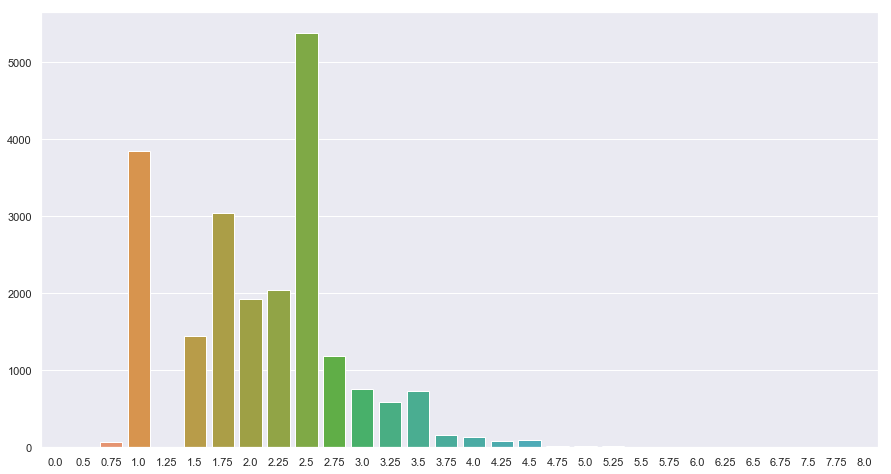

In [27]:
drawCountPlot(houses['bathrooms'])
# Most of the houses have 2.5 bathrooms

## lat, long

In [28]:
# Let's do Hierarchical Clustering on latitude and longitude to understand the clusters (areas)
X = houses[['lat', 'long', 'grade']]
Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(21612, 4)

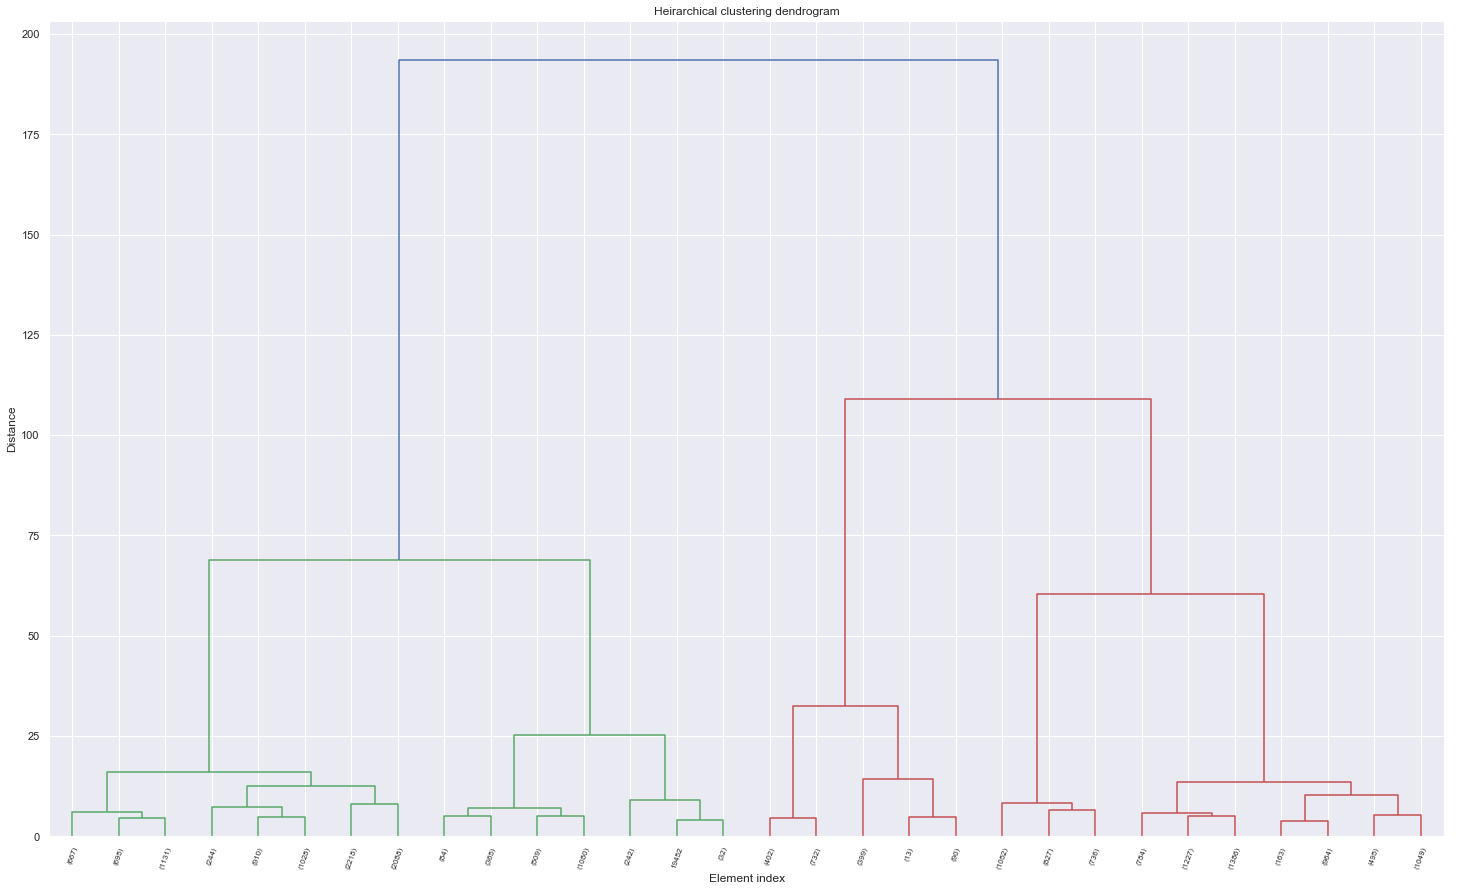

In [29]:
plt.figure(figsize=(25,15))
plt.title('Heirarchical clustering dendrogram')
plt.xlabel("Element index")
plt.ylabel("Distance")
dendrogram(Z, 
           distance_sort=False,    
           leaf_rotation=70,  # rotates the x axis labels
           leaf_font_size=8,  # font size for the x axis labels
           truncate_mode='lastp'
        )
plt.show()
plt.close()

In [30]:
optimal_distance = 50

In [31]:
clusters = fcluster(Z, optimal_distance, criterion='distance')
np.unique(clusters)

array([1, 2, 3, 4, 5], dtype=int32)

In [32]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{1: 8981, 2: 2313, 3: 1636, 4: 2615, 5: 6068}

In [33]:
houses['location_zone'] = clusters
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,year_month,year,month,day_of_month,day,location_zone
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,2014_10,2014,10,13,11-15,1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,2014_12,2014,12,9,6-10,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,2015_02,2015,2,25,21-25,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,2014_12,2014,12,9,6-10,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,2015_02,2015,2,18,16-20,5


In [34]:
# So let's understand the centroid of each
zone_centroids = pd.DataFrame(index=houses.columns)
for zone in unique:
    zone_centroids["Zone_{}".format(zone)] = houses[houses['location_zone'] == zone].mean()
zone_centroids

,Zone_1,Zone_2,Zone_3,Zone_4,Zone_5
date,NaN,NaN,NaN,NaN,NaN
price,402590.262332,295041.535668,1.257985e+06,773513.185851,542852.765656
bedrooms,3.252310,2.636403,3.993888e+00,3.773231,3.479895
bathrooms,1.829251,1.223843,3.197433e+00,2.664340,2.348179
sqft_living,1689.400401,1161.954604,3.872572e+03,2868.139962,2184.748517
sqft_lot,11766.438481,13977.512754,3.212285e+04,20638.515488,13510.186552
floors,1.297406,1.105275,1.913203e+00,1.849140,1.668177
waterfront,0.002561,0.006917,3.606357e-02,0.009560,0.006592
view,0.099766,0.097709,8.086797e-01,0.429446,0.246539
condition,3.491259,3.527886,3.221883e+00,3.266157,3.355471


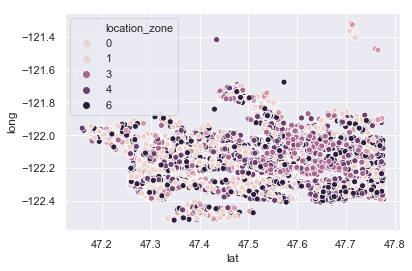

In [35]:
sns.scatterplot('lat', 'long', hue='location_zone', data=houses)

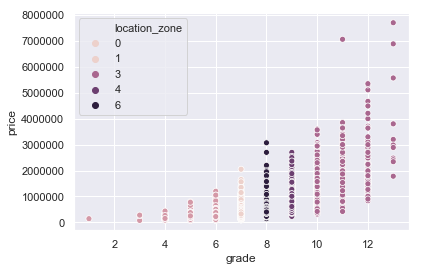

In [36]:
sns.scatterplot('grade', 'price', hue='location_zone', data=houses)

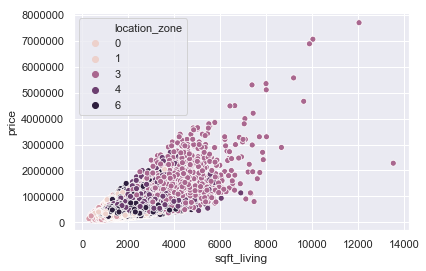

In [37]:
sns.scatterplot('sqft_living', 'price', hue='location_zone', data=houses)

In [38]:
houses['location_zone'].value_counts()

1    8981
5    6068
4    2615
2    2313
3    1636
Name: location_zone, dtype: int64

In [39]:
#houses = pd.get_dummies(houses, columns=['location_zone'], drop_first=True)
#houses = houses.drop(['lat', 'long', 'grade'], axis=1)

In [40]:
corr = houses.corr()['price']
corr.loc[(corr > 0.1) | (corr < -0.1)].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.315438
lat              0.307003
location_zone    0.270166
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
Name: price, dtype: float64

## Floors

In [41]:
houses['floors'].value_counts(normalize=True)
# Most, 49%, of the houses have just one floor. and 38% of the houses have 2-floors

1.0    0.494147
2.0    0.381298
1.5    0.088373
3.0    0.028363
2.5    0.007449
3.5    0.000370
Name: floors, dtype: float64

## yr_renovated

In [42]:
houses['yr_renovated'].value_counts(normalize=True)

# 95% of the houses are never renovated after they are built.

0       0.957711
2014    0.004210
2013    0.001712
2003    0.001666
2000    0.001619
2007    0.001619
2005    0.001619
2004    0.001203
1990    0.001157
2006    0.001110
2009    0.001018
1989    0.001018
2002    0.001018
1991    0.000925
2001    0.000879
1998    0.000879
1994    0.000879
1993    0.000879
1987    0.000833
1983    0.000833
1984    0.000833
2010    0.000833
2008    0.000833
1986    0.000787
1985    0.000787
1999    0.000787
1992    0.000787
2015    0.000740
1995    0.000740
1996    0.000694
          ...   
1975    0.000278
1978    0.000278
1981    0.000231
1964    0.000231
1965    0.000231
1958    0.000231
1973    0.000231
1969    0.000185
1972    0.000185
1960    0.000185
1963    0.000185
1956    0.000139
1945    0.000139
1974    0.000139
1953    0.000139
1955    0.000139
1976    0.000139
1957    0.000139
1962    0.000093
1950    0.000093
1967    0.000093
1946    0.000093
1971    0.000093
1940    0.000093
1954    0.000046
1934    0.000046
1959    0.000046
1951    0.0000

In [43]:
# check for anomalies where date_built is later than data_renovated
houses.loc[(houses['sqft_living'] == houses['sqft_living15']) & (houses['yr_renovated'] != 0) & (houses['yr_built'] > houses['yr_renovated']), ['yr_renovated', 'yr_built']]

# There are no anomalies found

,yr_renovated,yr_built


## sqft_living

In [44]:
# Let's check the outlies
outliers_sqft_living = grab_outliers_ZScore(houses, 'sqft_living')['sqft_living']
print("Total outliers = {}".format(len(outliers_sqft_living)))
outliers_sqft_living[0:10]

Total outliers = 248


5      5420
153    5180
269    5050
270    5310
419    6070
436    4870
484    4860
486    4860
527    6050
540    5403
Name: sqft_living, dtype: int64

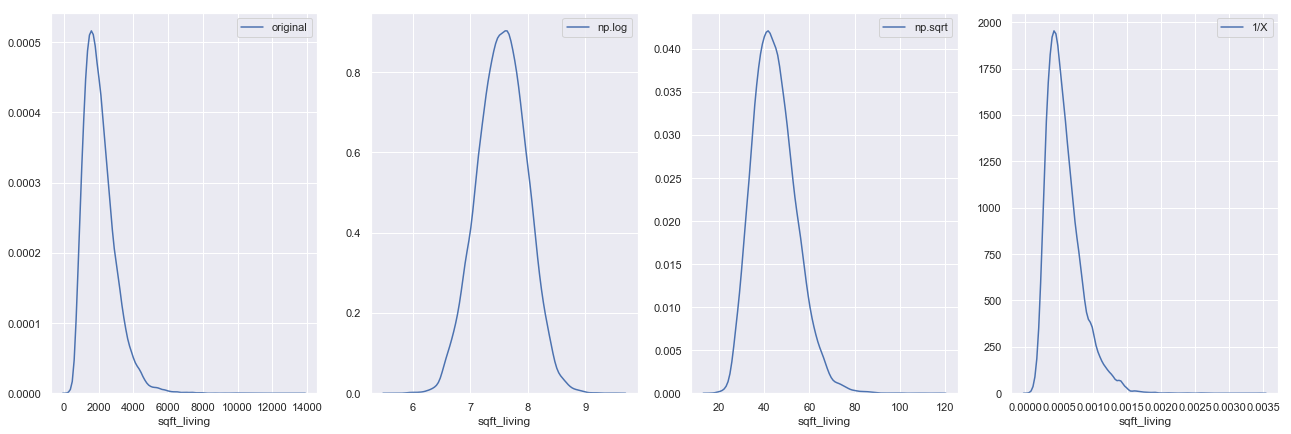

In [45]:
# So there are 248 outliers. Let's try to transform this data using various techniques to find the best one for this data.
field = 'sqft_living'
log_transformed = np.log(houses[field])
sqrt_transformed = np.sqrt(houses[field])
onebyX_transformed = (1/houses[field])

plt.subplots(1, 4, figsize=(22, 7))

plt.subplot(1, 4, 1)
ax = sns.distplot(houses[field], hist=False, kde=True, label="original")

plt.subplot(1, 4, 2)
sns.distplot(log_transformed, hist=False, kde=True, label="np.log")

plt.subplot(1, 4, 3)
sns.distplot(sqrt_transformed, hist=False, kde=True, label="np.sqrt")

plt.subplot(1, 4, 4)
sns.distplot(onebyX_transformed, hist=False, kde=True, label="1/X")

plt.show()
plt.close()

In [46]:
print('Original --> skewness = {}, kurtosis = {}\n'.format(str(houses[field].skew()), str(houses[field].kurtosis())))   
print('np.log --> skewness = {}, kurtosis = {}\n'.format(str(log_transformed.skew()), str(log_transformed.kurtosis())))   
print('np.sqrt --> skewness = {}, kurtosis = {}\n'.format(str(sqrt_transformed.skew()), str(sqrt_transformed.kurtosis())))
print('1/X --> skewness = {}, kurtosis = {}\n'.format(str(onebyX_transformed.skew()), str(onebyX_transformed.kurtosis())))

Original --> skewness = 1.471555426802092, kurtosis = 5.24309298981711

np.log --> skewness = -0.03543769299569605, kurtosis = -0.05467803316887965

np.sqrt --> skewness = 0.6177889916703141, kurtosis = 0.8621175568029935

1/X --> skewness = 1.4175326640718737, kurtosis = 3.9697079002524953



In [47]:
# log transformation (np.log) transforms the data to normal and reducing skewness, so let's use log transformed data for sqft_living
houses['sqft_living'] = log_transformed

In [48]:
# Let's again check the outlies
outliers_sqft_living = grab_outliers_ZScore(houses, 'sqft_living')['sqft_living']
print("Total outliers = {}".format(len(outliers_sqft_living)))
outliers_sqft_living[0:10]
# Outliers have heavily reduced from 248 to just 35 (85.88%) reduction

Total outliers = 35


1164    8.988446
1315    8.907883
1448    8.987197
2444    8.830543
2713    8.902456
3020    8.843615
3914    9.214332
4024    8.919988
4149    8.865029
4411    9.126959
Name: sqft_living, dtype: float64

## sqft_living15

In [49]:
# Let's check the outlies
outliers_sqft_living15 = grab_outliers_ZScore(houses, 'sqft_living15')['sqft_living15']
print("Total outliers = {}".format(len(outliers_sqft_living)))
outliers_sqft_living15[0:10]

Total outliers = 35


5      4760
21     4110
270    4180
300    4550
384    4050
419    4680
473    4300
527    4210
679    4190
722    4230
Name: sqft_living15, dtype: int64

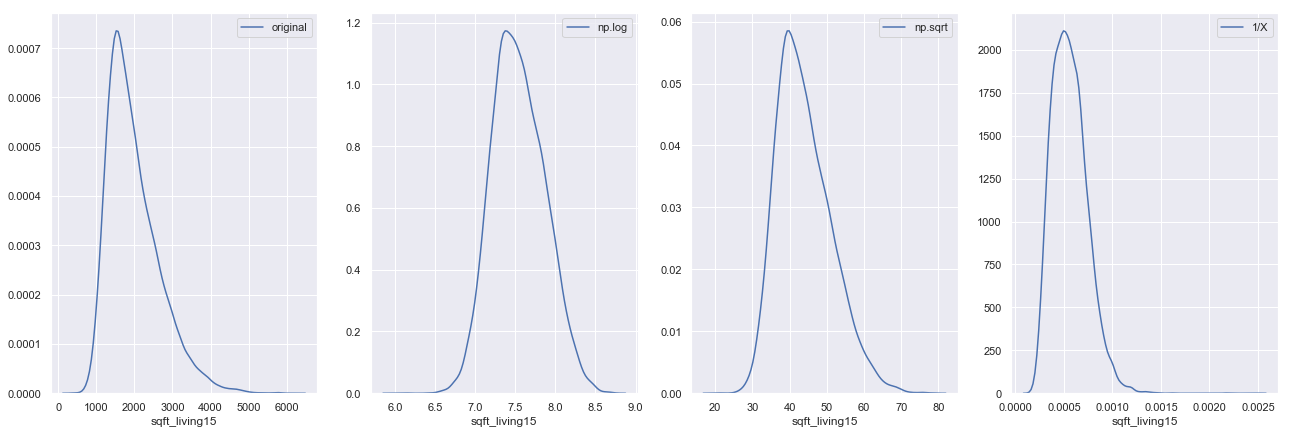

In [50]:
# So there are 35 outliers. Let's try to transform this data using various techniques to find the best one for this data.
field = 'sqft_living15'
log_transformed = np.log(houses[field])
sqrt_transformed = np.sqrt(houses[field])
onebyX_transformed = (1/houses[field])

plt.subplots(1, 4, figsize=(22, 7))

plt.subplot(1, 4, 1)
sns.distplot(houses[field], hist=False, kde=True, label="original")

plt.subplot(1, 4, 2)
sns.distplot(log_transformed, hist=False, kde=True, label="np.log")

plt.subplot(1, 4, 3)
sns.distplot(sqrt_transformed, hist=False, kde=True, label="np.sqrt")

plt.subplot(1, 4, 4)
sns.distplot(onebyX_transformed, hist=False, kde=True, label="1/X")

plt.show()

In [51]:
print('Original --> skewness = {}, kurtosis = {}'.format(str(houses[field].skew()), str(houses[field].kurtosis())))   
print('np.log --> skewness = {}, kurtosis = {}'.format(str(log_transformed.skew()), str(log_transformed.kurtosis())))   
print('np.sqrt --> skewness = {}, kurtosis = {}'.format(str(sqrt_transformed.skew()), str(sqrt_transformed.kurtosis())))
print('1/X --> skewness = {}, kurtosis = {}'.format(str(onebyX_transformed.skew()), str(onebyX_transformed.kurtosis())))

Original --> skewness = 1.1081812758966967, kurtosis = 1.5970958104616884
np.log --> skewness = 0.20649673445864591, kurtosis = -0.2071722477906488
np.sqrt --> skewness = 0.640517255497765, kurtosis = 0.29569019687137965
1/X --> skewness = 0.7489999136468988, kurtosis = 1.6918871182459734


In [52]:
# log transformation (np.log) transforms the data to normal and reducing skewness, so let's use log transformed data for sqft_living
houses['sqft_living15'] = log_transformed

In [53]:
# Let's again check the outlies
outliers_sqft_living15 = grab_outliers_ZScore(houses, 'sqft_living15')['sqft_living15']
print("Total outliers = {}".format(len(outliers_sqft_living)))
outliers_sqft_living15[0:10]
# Outliers have changed, but number of outliers have remained same.

Total outliers = 35


1123    8.663888
1530    8.630522
2713    8.590444
4967    8.582981
5451    8.663888
5561    8.581107
6952    8.523175
7035    8.531096
7458    8.550628
9253    8.523175
Name: sqft_living15, dtype: float64

## sqft_lot

In [54]:
outliers_sqft_lot = grab_outliers_IQR(houses, 'sqft_lot')['sqft_lot']
print("Total outliers = {}".format(len(outliers_sqft_lot)))
outliers_sqft_lot[0:10]

Total outliers = 2425


5     101930
12     19901
21     44867
36     34848
41     24186
49     65005
60     21235
69     20158
70     50094
74     50529
Name: sqft_lot, dtype: int64

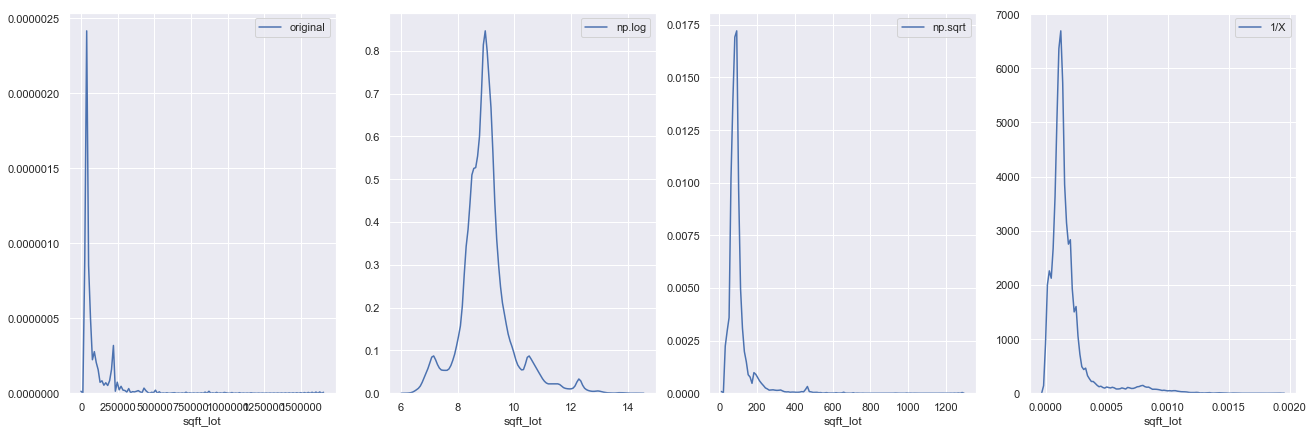

In [55]:
# So there are 2425 outliers. Let's try to transform this data using various techniques to find the best one for this data.
field = 'sqft_lot'
log_transformed = np.log(houses[field])
sqrt_transformed = np.sqrt(houses[field])
onebyX_transformed = (1/houses[field])
#boxcox_transformed,_ = stats.boxcox(houses[field])
rows = 1
columns = 4

plt.subplots(rows, columns, figsize=(22, 7))

plt.subplot(rows, columns, 1)
sns.distplot(houses[field], hist=False, kde=True, label="original")

plt.subplot(rows, columns, 2)
sns.distplot(log_transformed, hist=False, kde=True, label="np.log")

plt.subplot(rows, columns, 3)
sns.distplot(sqrt_transformed, hist=False, kde=True, label="np.sqrt")

plt.subplot(rows, columns, 4)
sns.distplot(onebyX_transformed, hist=False, kde=True, label="1/X")

plt.show()
plt.close()

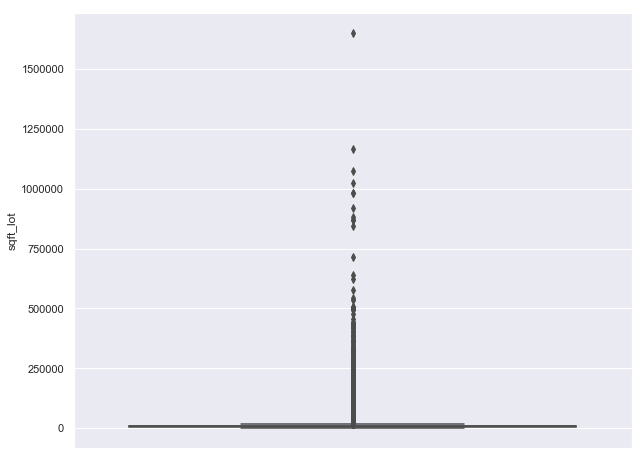

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(y=houses[field])
plt.show()
plt.close()

In [57]:
print('Original --> skewness = {}, kurtosis = {}'.format(str(houses[field].skew()), str(houses[field].kurtosis())))   
print('np.log --> skewness = {}, kurtosis = {}'.format(str(log_transformed.skew()), str(log_transformed.kurtosis())))   
print('np.sqrt --> skewness = {}, kurtosis = {}'.format(str(sqrt_transformed.skew()), str(sqrt_transformed.kurtosis())))
print('1/X --> skewness = {}, kurtosis = {}'.format(str(onebyX_transformed.skew()), str(onebyX_transformed.kurtosis())))

Original --> skewness = 13.060018959031755, kurtosis = 285.0778196973658
np.log --> skewness = 0.9621711661039318, kurtosis = 3.325868196652797
np.sqrt --> skewness = 4.783397352376896, kurtosis = 34.782383888993806
1/X --> skewness = 3.279598589229162, kurtosis = 13.176382092144358


In [58]:
outliers = grab_outliers_IQR(houses, field)[['price', 'sqft_lot', 'sqft_lot15', 'sqft_living']].sort_values(by='sqft_lot' )
outliers.shape

(2425, 4)

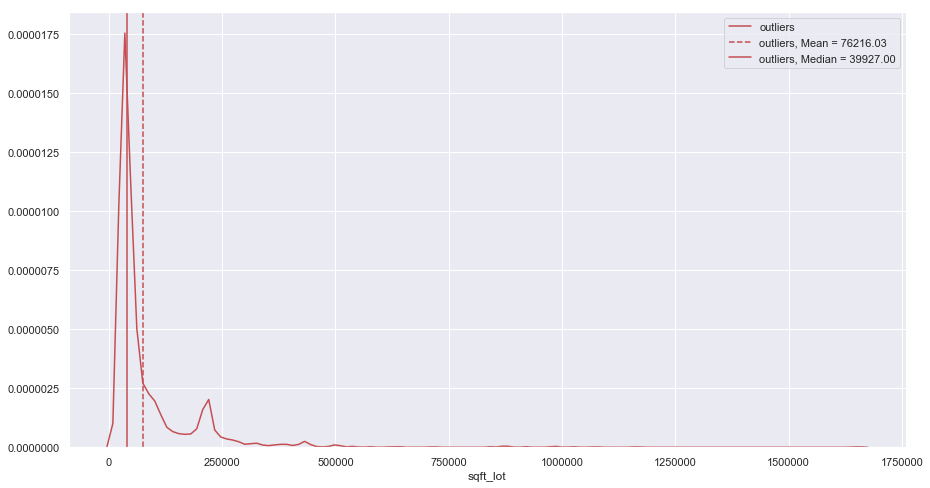

outliers --> skewness = 5.248662129860884, kurtosis = 45.367503268751626



In [59]:
drawDistplot(outliers['sqft_lot'], hist=False, kde=True, color='r', name='outliers', bins=200)
#sns.distplot(outliers['sqft_lot'], hist=True, kde=False, bins=20)

In [60]:
regular = houses[houses['sqft_lot'] < 15000]
big = houses[(houses['sqft_lot'] >= 15000) & (houses['sqft_lot'] < 40000)]
huge1 = houses[(houses['sqft_lot'] >= 40000) & (houses['sqft_lot'] < 100000)]
huge2 = houses[(houses['sqft_lot'] >= 100000) & (houses['sqft_lot'] < 300000)]
giant1 = houses[(houses['sqft_lot'] >= 300000) & (houses['sqft_lot'] < 600000)]
giant2 = houses[houses['sqft_lot'] >= 600000]

regular.shape, big.shape, huge1.shape, huge2.shape, giant1.shape, giant2.shape

((18340, 26), (2064, 26), (743, 26), (395, 26), (57, 26), (14, 26))

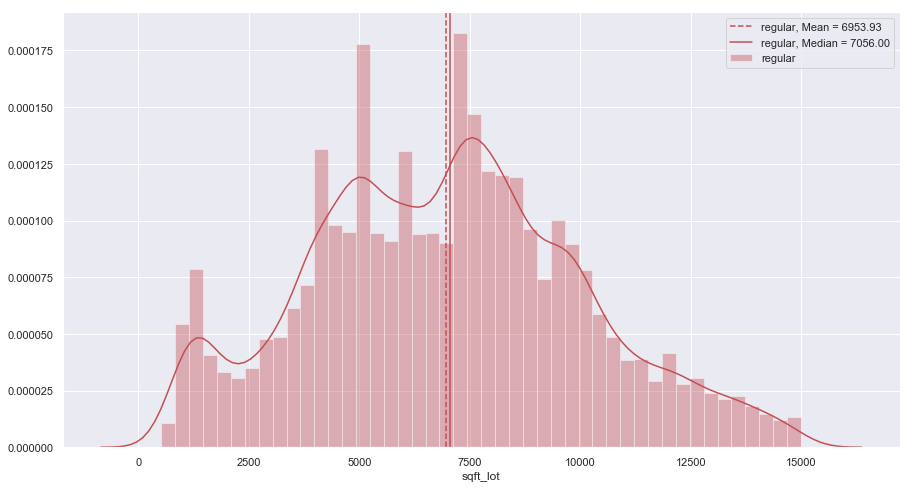

regular --> skewness = 0.16802123013106274, kurtosis = -0.38202449327786336



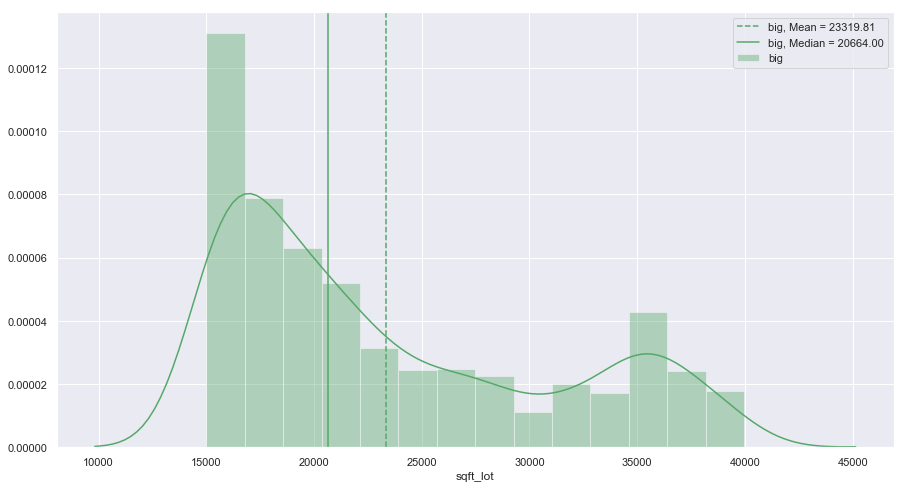

big --> skewness = 0.7452947294446297, kurtosis = -0.8163186467839934



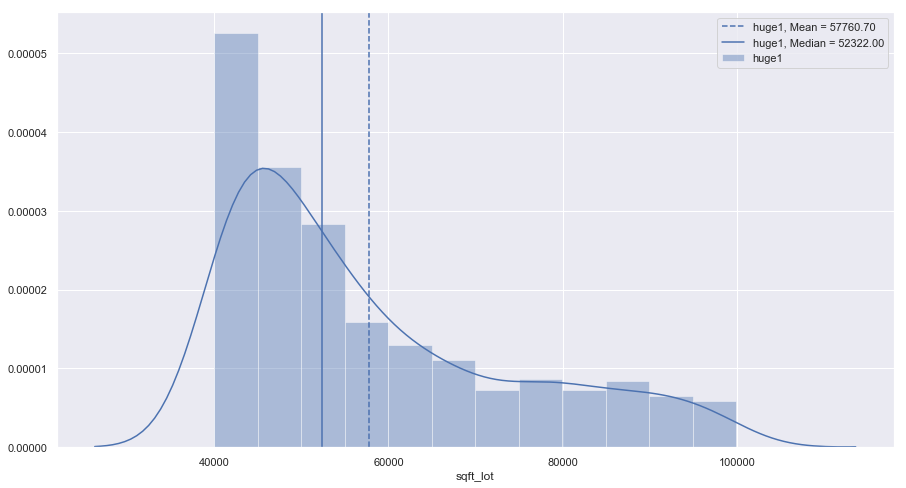

huge1 --> skewness = 0.9868916470605249, kurtosis = -0.14257874853012797



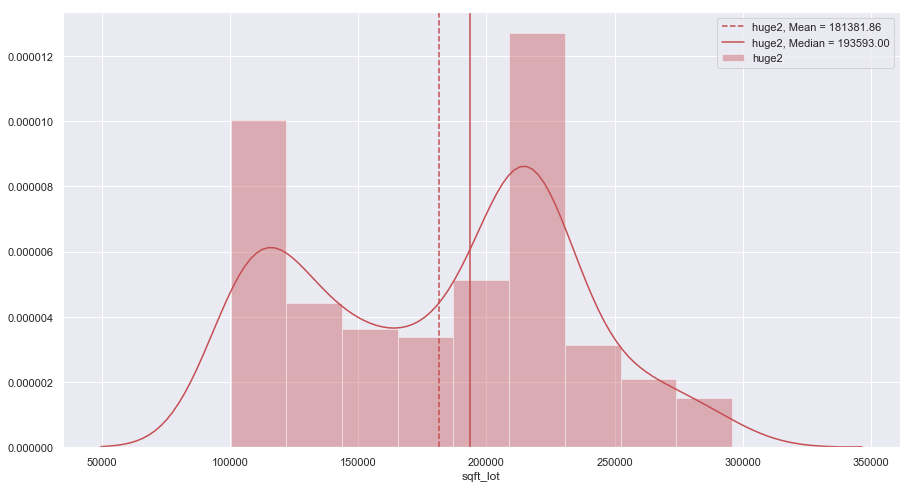

huge2 --> skewness = -0.039917260516466026, kurtosis = -1.1172215987610472



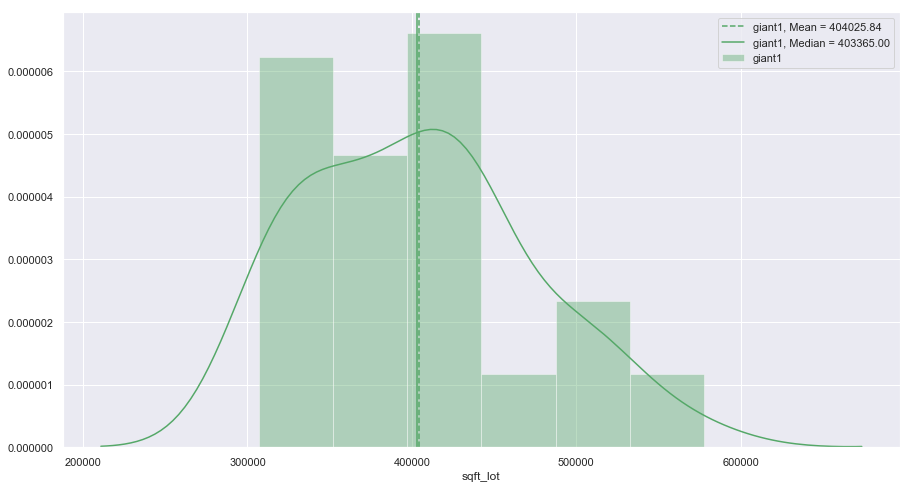

giant1 --> skewness = 0.4518482545950535, kurtosis = -0.4377590438429495



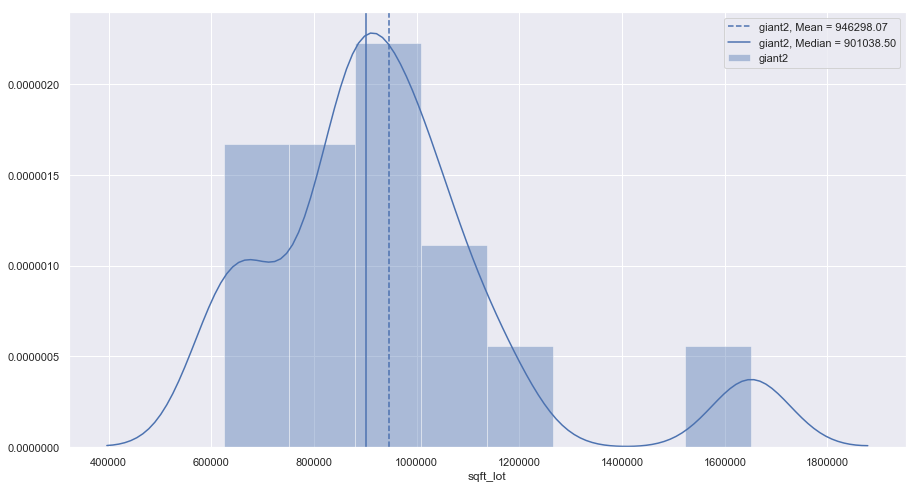

giant2 --> skewness = 1.5497358939494772, kurtosis = 4.008041730115309



In [61]:
drawDistplot(regular['sqft_lot'], hist=True, kde=True, color='r', name='regular')
drawDistplot(big['sqft_lot'], hist=True, kde=True, color='g', name='big')
drawDistplot(huge1['sqft_lot'], hist=True, kde=True, color='b', name='huge1')
drawDistplot(huge2['sqft_lot'], hist=True, kde=True, color='r', name='huge2')
drawDistplot(giant1['sqft_lot'], hist=True, kde=True, color='g', name='giant1')
drawDistplot(giant2['sqft_lot'], hist=True, kde=True, color='b', name='giant2')


In [62]:
grab_outliers_IQR(regular, 'sqft_lot').shape, grab_outliers_IQR(big, 'sqft_lot').shape, grab_outliers_IQR(huge1, 'sqft_lot').shape,grab_outliers_IQR(huge2, 'sqft_lot').shape, grab_outliers_IQR(giant1, 'sqft_lot').shape, grab_outliers_IQR(giant2, 'sqft_lot').shape

((0, 26), (0, 26), (0, 26), (0, 26), (1, 26), (1, 26))

In [63]:
regular['price'].median(), big['price'].median(), huge1['price'].median(), huge2['price'].median(), giant1['price'].median(), giant2['price'].median()

(435000.0, 554000.0, 568000.0, 568000.0, 617000.0, 819950.0)

In [64]:
# Let's create bins for 'sqft_plot' as seen above

bins = [0, 14999, 39999, 99999, 299999, 599999, 1800000]
labels = ['regular', 'big' ,'huge1', 'huge2', 'giant1', 'giant2']
houses['sqft_lot_category'] = pd.cut(houses['sqft_lot'], bins, labels=labels, include_lowest=True)
houses['sqft_lot_category'].value_counts()

regular    18340
big         2064
huge1        743
huge2        395
giant1        57
giant2        14
Name: sqft_lot_category, dtype: int64

In [65]:
houses.groupby('sqft_lot_category').agg('mean').T

sqft_lot_category,regular,big,huge1,huge2,giant1,giant2
price,509035.079826,738779.420543,670902.099596,657445.341772,721032.456140,936492.857143
bedrooms,3.336587,3.609981,3.485868,3.427848,3.333333,3.285714
bathrooms,2.068770,2.345325,2.375505,2.462658,2.583333,2.803571
sqft_living,7.504375,7.792616,7.816252,7.859626,7.851786,7.972082
sqft_lot,6953.932824,23319.807655,57760.695828,181381.863291,404025.842105,946298.071429
floors,1.496674,1.454700,1.504711,1.546835,1.614035,1.714286
waterfront,0.003871,0.033915,0.025572,0.005063,0.017544,0.000000
view,0.193511,0.512112,0.335128,0.349367,1.105263,0.571429
condition,3.409215,3.431686,3.421265,3.275949,3.456140,3.357143
grade,7.545420,8.296996,8.228802,8.288608,8.192982,8.928571


In [66]:
houses = pd.get_dummies(houses, columns=['sqft_lot_category'], drop_first=True)
houses = houses.drop(['sqft_lot'], axis=1)

In [67]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,...,year,month,day_of_month,day,location_zone,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2
0,2014-10-13,221900.0,3,1.00,7.073270,1.0,0,0,3,7,...,2014,10,13,11-15,1,0,0,0,0,0
1,2014-12-09,538000.0,3,2.25,7.851661,2.0,0,0,3,7,...,2014,12,9,6-10,1,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,6.646391,1.0,0,0,3,6,...,2015,2,25,21-25,2,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,7.580700,1.0,0,0,5,7,...,2014,12,9,6-10,1,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,7.426549,1.0,0,0,3,8,...,2015,2,18,16-20,5,0,0,0,0,0


## sqft_above

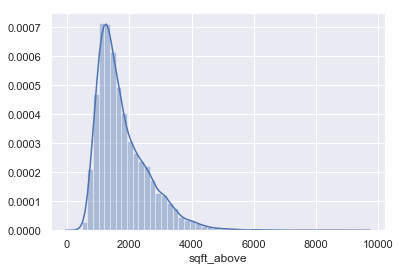

In [68]:
# Let's check out distribution of 'sqft_above'
sns.distplot(houses['sqft_above'])

In [69]:
outliers_sqft_above = grab_outliers_IQR(houses, 'sqft_above')['sqft_above']
print("Total outliers = {}".format(len(outliers_sqft_above)))
outliers_sqft_above[0:10]

Total outliers = 611


5      3890
235    3760
269    4750
270    5310
394    3840
419    6070
431    4040
471    3840
484    4860
486    3860
Name: sqft_above, dtype: int64

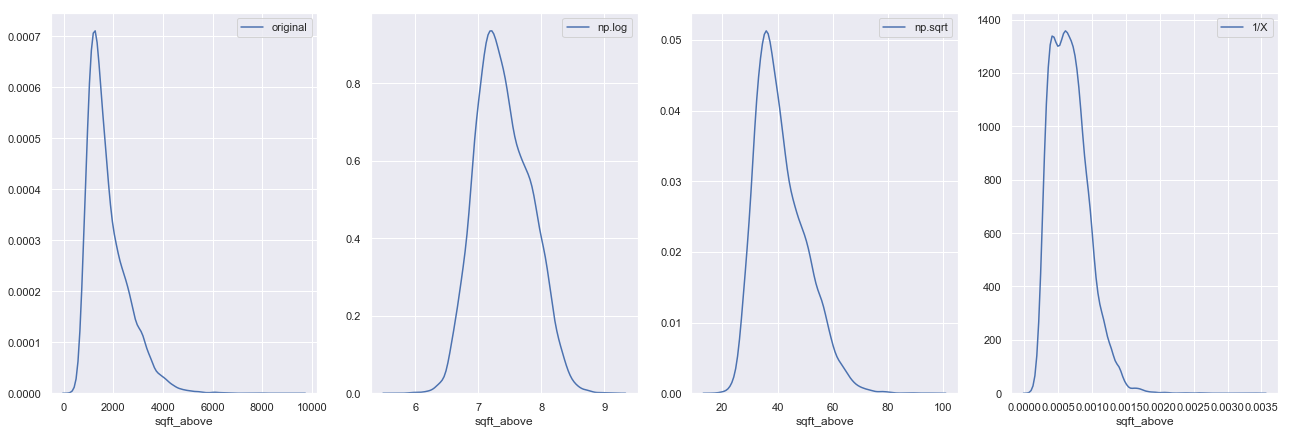

In [70]:
# So there are 2425 outliers. Let's try to transform this data using various techniques to find the best one for this data.
field = 'sqft_above'
log_transformed = np.log(houses[field])
sqrt_transformed = np.sqrt(houses[field])
onebyX_transformed = (1/houses[field])
#boxcox_transformed,_ = stats.boxcox(houses[field])
rows = 1
columns = 4

plt.subplots(rows, columns, figsize=(22, 7))

plt.subplot(rows, columns, 1)
sns.distplot(houses[field], hist=False, kde=True, label="original")

plt.subplot(rows, columns, 2)
sns.distplot(log_transformed, hist=False, kde=True, label="np.log")

plt.subplot(rows, columns, 3)
sns.distplot(sqrt_transformed, hist=False, kde=True, label="np.sqrt")

plt.subplot(rows, columns, 4)
sns.distplot(onebyX_transformed, hist=False, kde=True, label="1/X")

plt.show()

In [71]:
print(field)
print('Original --> skewness = {}, kurtosis = {}'.format(str(houses[field].skew()), str(houses[field].kurtosis())))   
print('np.log --> skewness = {}, kurtosis = {}'.format(str(log_transformed.skew()), str(log_transformed.kurtosis())))   
print('np.sqrt --> skewness = {}, kurtosis = {}'.format(str(sqrt_transformed.skew()), str(sqrt_transformed.kurtosis())))
print('1/X --> skewness = {}, kurtosis = {}'.format(str(onebyX_transformed.skew()), str(onebyX_transformed.kurtosis())))

sqft_above
Original --> skewness = 1.4466644733818372, kurtosis = 3.40230362139787
np.log --> skewness = 0.2533841263015587, kurtosis = -0.3179775645517249
np.sqrt --> skewness = 0.7920902536589387, kurtosis = 0.5724153952363955
1/X --> skewness = 0.8927476434548465, kurtosis = 1.816503076055139


In [72]:
# log transformation (np.log) transforms the data to normal and reducing skewness, so let's use log transformed data for sqft_above
houses['sqft_above'] = np.log(houses['sqft_above'])

In [73]:
# Let's check the outliers again.
outliers_sqft_above = grab_outliers_IQR(houses, 'sqft_above')['sqft_above']
print("Total outliers = {}".format(len(outliers_sqft_above)))
outliers_sqft_above[0:10]

# Outliers have heavily reduced from 611 to just 53 (91.32%) reduction

Total outliers = 53


419     8.711114
465     6.063785
527     8.707814
860     5.940171
1055    8.642944
1100    8.711114
1164    8.697847
1168    6.086775
1448    8.812843
1807    8.649974
Name: sqft_above, dtype: float64

### Views

In [74]:
# Let's fetch different insights on Total sales for "no of views" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='view', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

## Bivariate/Mulitvariate Analysis

In [75]:
# Let's fetch different insights on sales for "different months" 
aggregations = {'price': [np.mean, sum, len, max, min]}

columns_to_aggregate = [k for k in aggregations.keys()]

cm = sns.light_palette("green", as_cmap=True)

pd.pivot_table(houses, values=columns_to_aggregate, index=['day'], 
               aggfunc=aggregations).style.background_gradient(cmap='summer_r').apply(highlight_max, axis=0)

In [76]:
# Let's fetch different insights on sales for "different months" 
aggregations = {'price': [np.mean, sum, len, max, min]}

columns_to_aggregate = [k for k in aggregations.keys()]

cm = sns.light_palette("green", as_cmap=True)

pd.pivot_table(houses, values=columns_to_aggregate, index=['year', 'month'], 
               aggfunc=aggregations).style.background_gradient(cmap='summer_r').apply(highlight_max, axis=0)

1. In year 2014, July has got maximum number of deals but June has got maximum total sales
2. In year 2015, April has got maximum number of deals as well as maximum total sales.
3. The max single deal is in October 2014 for whopping 77,00,000 USD
4. The min single deal is in February 2015 for 75K

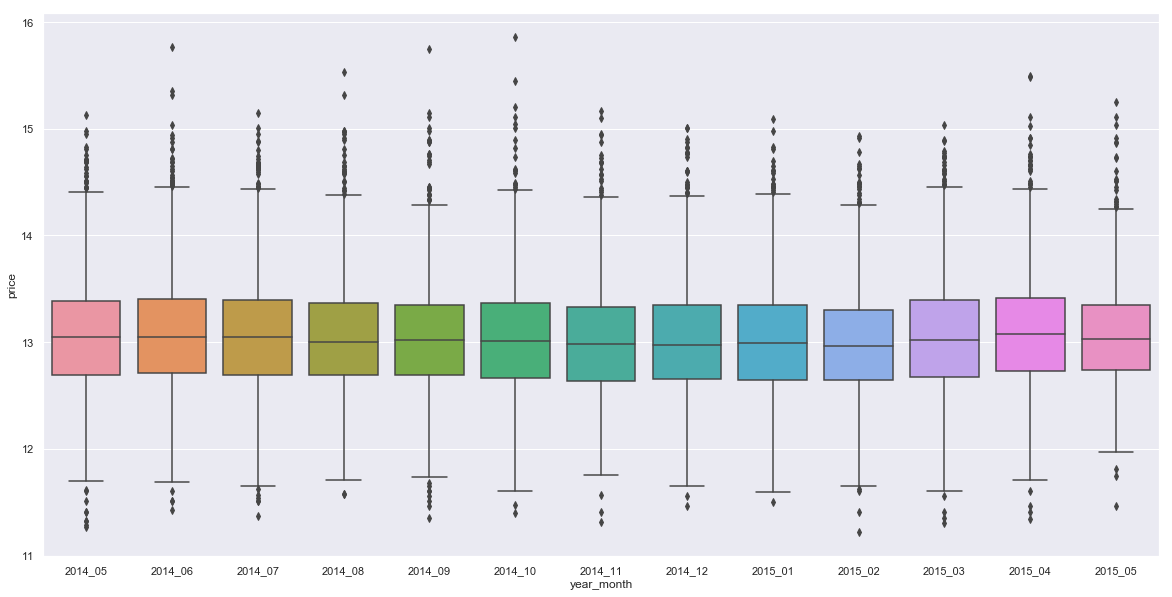

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(houses['year_month'], np.log(houses['price']))
#sns.boxplot(houses['day'], houses['price'])

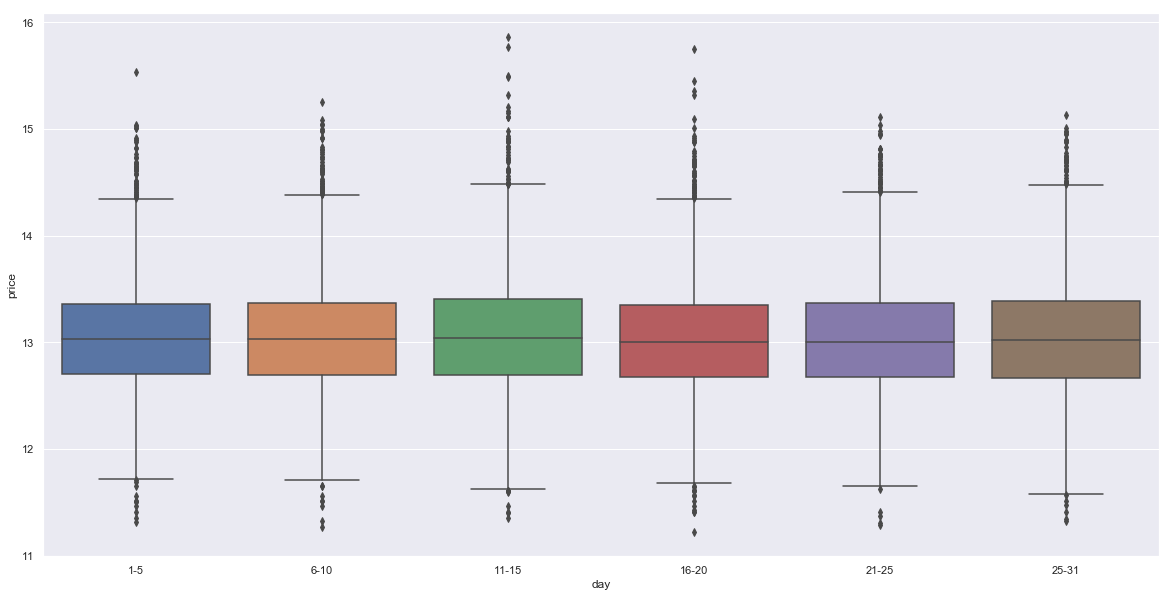

In [78]:
plt.figure(figsize=(20,10))
#sns.boxenplot(houses['day'], houses['price'])
sns.boxplot(houses['day'], np.log(houses['price']))

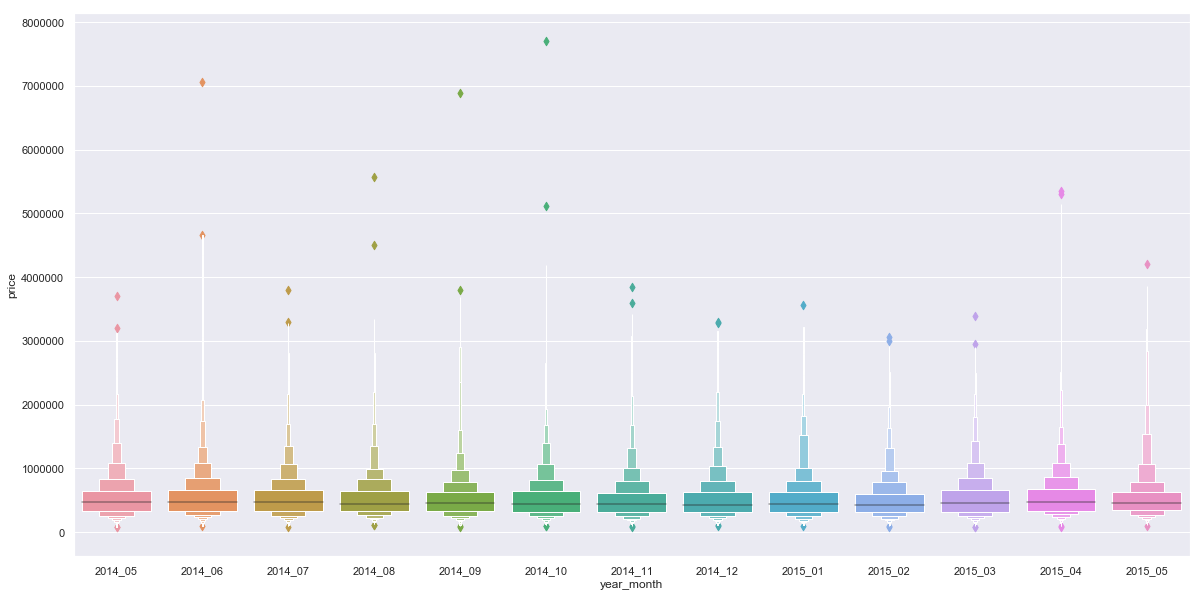

In [79]:
plt.figure(figsize=(20,10))
sns.boxenplot(houses['year_month'], houses['price'])

In [80]:
# Let's fetch different insights on sales for "no of bedrooms" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='bedrooms', 
               aggfunc=aggregations)
data.style.background_gradient(cmap='summer_r').apply(highlight_min, axis=0)

# 33 Bedroom apartment for 640K, this is an outlier
# Also 11 Bedroom apartment for 520K is another outlier
# Let's investigate these houses further

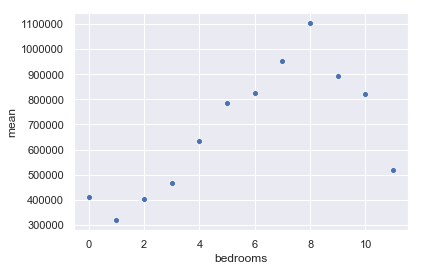

In [81]:
# Let's plot the mean value of houses vs no. of bedrooms
sns.scatterplot(data.index, data['price']['mean'])

In [82]:
# Let's check the year built for both these apartments
houses[houses['bedrooms'].isin([10, 11, 33])][['bedrooms', 'price','grade', 'sqft_living','floors','condition','yr_built']]
# Most of them (except one with 10 bedrooms built in 2008) are pretty old houses so they are sold for dirt cheap

,bedrooms,price,grade,sqft_living,floors,condition,yr_built
8757,11,520000.0,7,8.006368,2.0,3,1918
13314,10,1148000.0,9,8.431635,1.0,3,2008
15161,10,650000.0,7,8.191463,2.0,4,1958
19254,10,660000.0,7,7.979339,2.0,4,1913


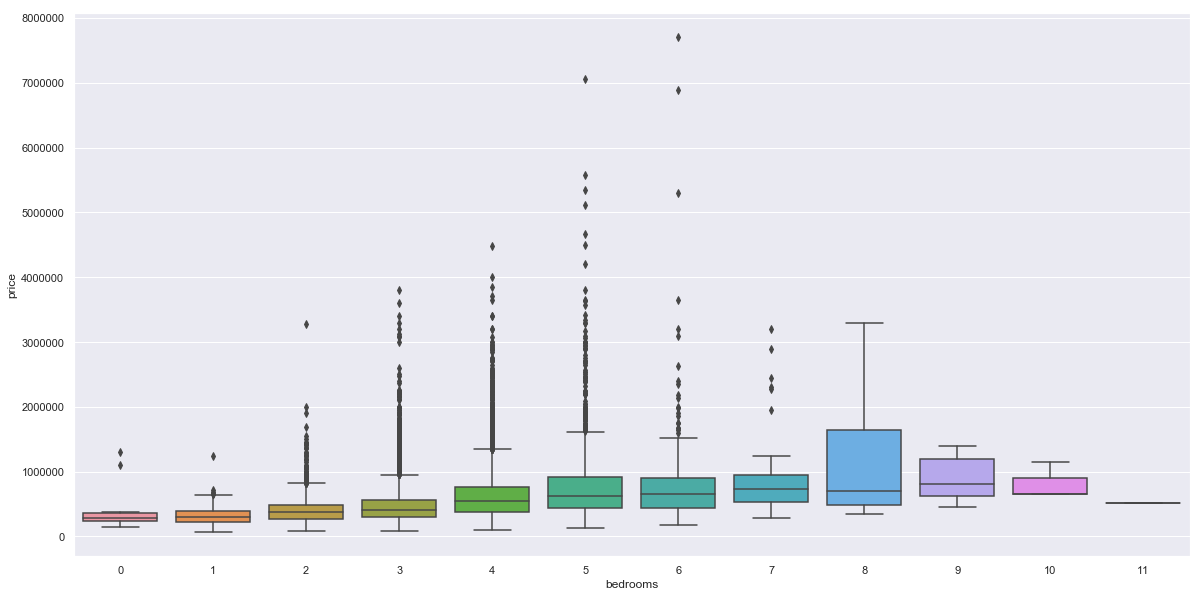

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(houses['bedrooms'], houses['price'])

In [84]:
# We can use following to dig deep into this are. This gives insights about Year-Month wise Total Sales for 
# different "no of bedrooms"
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index=['year', 'month', 'bedrooms'], 
               aggfunc=aggregations)
data.style.background_gradient(cmap='summer_r').apply(highlight_min)

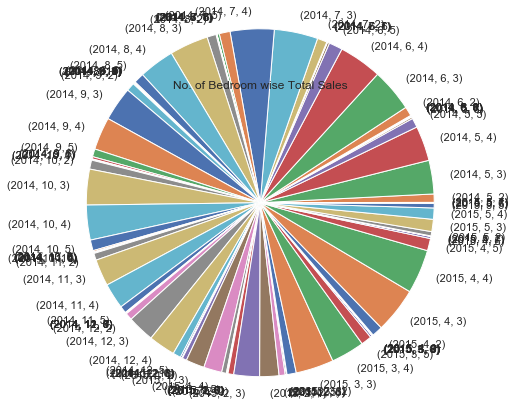

In [85]:
plt.pie(data['price']['sum'], labels=data.index, radius=2)
plt.title("No. of Bedroom wise Total Sales")
plt.show()

In [86]:
houses.groupby([houses['year_month'], houses['bedrooms']] )['price'].agg(['mean', 'min', 'max']).style.background_gradient(cmap=cm, axis=0).apply(highlight_min)

In [87]:
# Let's fetch different insights on Total sales for "no of bathrooms" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='bathrooms', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

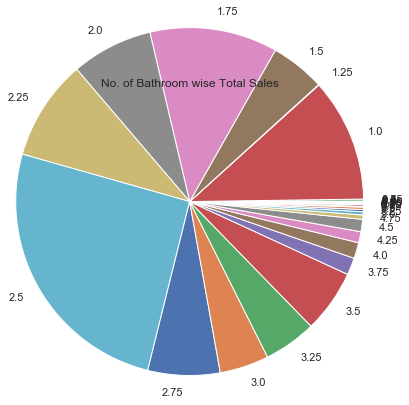

In [88]:
plt.pie(data['price']['sum'], labels=data.index, radius=2)
plt.title("No. of Bathroom wise Total Sales")
plt.show()

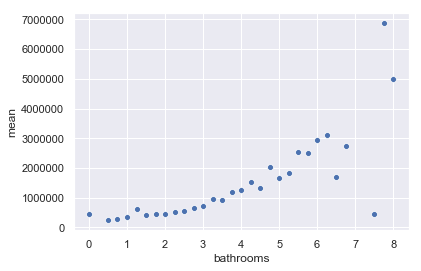

In [89]:
# Let's plot the mean value of houses vs no. of bathrooms
sns.scatterplot(data.index, data['price']['mean'])

1. 2.5 bathrooms are the most preferred bringing in Total Sales of USD 2978350000/-
2. 1 bathrooms are second most preferred brining in Total Sales of USD 1336800000/-
3. In general, as number of bathrooms increase the mean prices keeps going up. There are a few exceptions though at "no. of bathrooms" value equals 6.5 & 6.75, 7.5

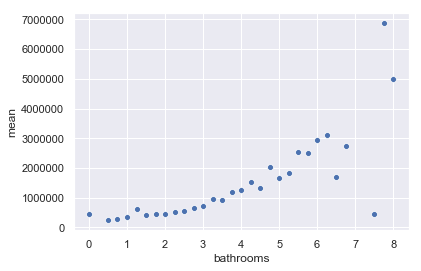

In [90]:
 #Let's plot the mean value of houses vs no. of bathrooms
sns.scatterplot(data.index, data['price']['mean'])

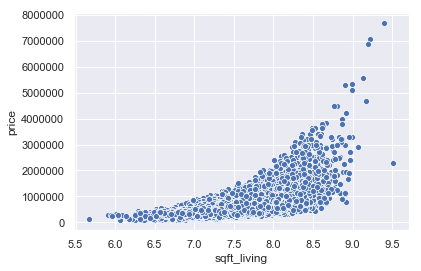

In [91]:
sns.scatterplot(x='sqft_living', y='price', data=houses)

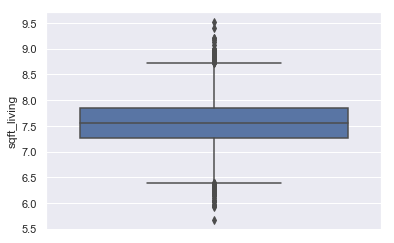

In [92]:
sns.boxplot("sqft_living", data=houses, orient='v')

In [93]:
# Let's fetch different insights on Total sales for "no of floors" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='floors', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

1. 1 Floor and 2 Floor houses are more popular. 
2. 2 Floor houses bring in maximum Total Sales.

In [94]:
# Let's fetch different insights on Total sales for "waterfront & non-waterfront" houses 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='waterfront', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

1. Most of the houses are Non-Waterfront bringing in maximum Total Sales

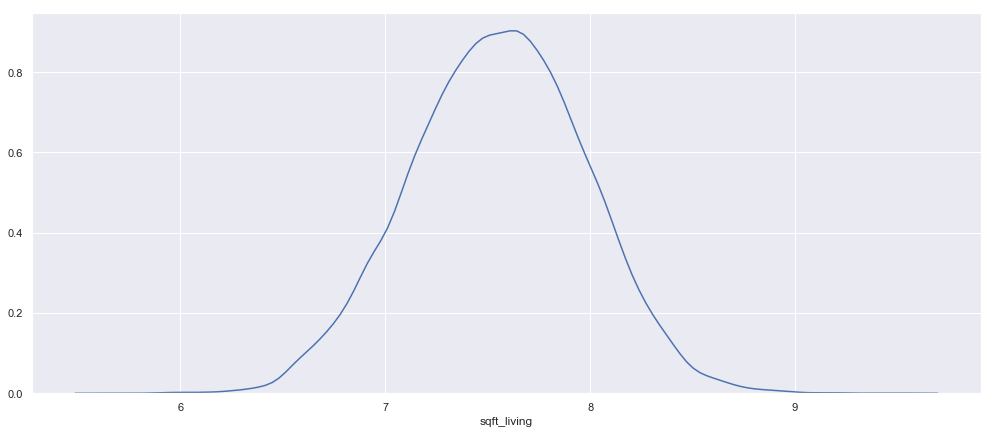

In [95]:
# Let's check the distribution of "sqft_living"
plt.figure(figsize=(17, 7))
sns.distplot(houses['sqft_living'], hist=False, kde=True)
plt.show()

In [96]:
# Since the dataset looks more normal, except a long right tail; let me use ZScore to find outliers
outliers_sqft_living = grab_outliers_ZScore(houses, 'sqft_living')['sqft_living']
print("Total outliers = {}".format(len(outliers_sqft_living)))
outliers_sqft_living[0:10]

Total outliers = 35


1164    8.988446
1315    8.907883
1448    8.987197
2444    8.830543
2713    8.902456
3020    8.843615
3914    9.214332
4024    8.919988
4149    8.865029
4411    9.126959
Name: sqft_living, dtype: float64

In [97]:
# How many bedroom 
data = pd.crosstab(houses['condition'], [houses['bedrooms'], houses['bathrooms']]).T
data.to_excel("bedroombathroom_condition_crosstab.xlsx")
data

condition            1   2    3    4    5
bedrooms bathrooms                       
0        0.00        1   0    5    1    0
         0.75        0   0    1    0    0
         1.00        0   1    0    0    0
         1.50        0   0    1    0    0
         2.50        0   0    3    0    0
1        0.00        0   1    1    1    0
         0.50        0   0    1    0    0
         0.75        1   3   14    5    4
         1.00        3   7   89   32    7
         1.25        0   0    1    1    0
         1.50        0   0    9    2    1
         1.75        0   0    2    2    0
         2.00        0   0    4    2    0
         2.25        0   0    2    2    0
         2.50        0   0    1    1    0
2        0.50        0   0    1    1    0
         0.75        0   1   11   12    2
         1.00       11  39  907  479  122
         1.25        0   0    3    0    0
         1.50        1   1  219   58   15
         1.75        0   5  174   99   26
         2.00        0   5  158   34   19
         2.25        0   0   92   21    5
         2.50        0   0  177   12    8
         2.75        0   0   18    1    1
         3.00        0   0   11    0    2
         3.25        0   0    8    0    0
         3.50        0   0    0    1    0
3        0.75        0   1    7    5    3
         1.00        3  32  947  654  144
...                 ..  ..  ...  ...  ...
7        2.75        0   0    1    1    1
         3.00        0   0    2    1    0
         3.25        0   0    1    0    0
         3.50        0   0    3    2    0
         3.75        0   0    2    0    0
         4.00        0   0    4    1    0
         4.25        0   0    2    0    0
         4.50        0   0    1    0    2
         4.75        0   0    2    0    0
         5.50        0   0    1    0    0
         5.75        0   0    1    0    0
         6.75        0   0    1    0    0
         8.00        0   0    1    0    0
8        2.50        0   0    1    0    0
         2.75        0   0    1    2    0
         3.00        0   0    2    0    0
         3.25        0   0    0    1    0
         3.50        0   0    0    0    1
         3.75        0   0    1    0    0
         4.00        0   0    1    0    1
         5.00        0   0    1    0    0
         6.00        0   0    1    0    0
9        3.00        0   0    2    0    0
         4.00        0   0    1    0    0
         4.50        0   0    2    0    0
         7.50        0   0    1    0    0
10       2.00        0   0    0    1    0
         3.00        0   0    0    1    0
         5.25        0   0    1    0    0
11       3.00        0   0    1    0    0

[143 rows x 5 columns]

In [98]:
# Let's fetch different insights on Total sales for "condition of house" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='condition', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

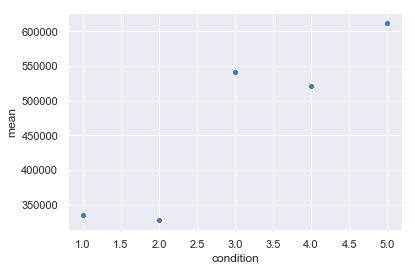

In [99]:
sns.scatterplot(data.index, data['price']['mean'])

In [100]:
# Cross tab between condition of house & grade of house
data = pd.crosstab(houses['condition'], [houses['grade']], margins='All')
data.to_excel("condition_grade_crosstab.xlsx")
data

grade,1,3,4,5,6,7,8,9,10,11,12,13,All
condition,,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0,30
2,0,1,5,15,59,75,13,2,2,0,0,0,172
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11,14031
4,0,0,10,84,685,2833,1394,446,156,56,13,2,5679
5,0,1,0,34,248,833,390,126,55,11,3,0,1701
All,1,3,29,242,2038,8981,6068,2615,1134,399,90,13,21613


In [101]:
subset_data = data.iloc[2:4,4:9]
subset_data

grade,6,7,8,9,10
condition,,,,,
3,1035,5234,4269,2041,921
4,685,2833,1394,446,156


In [102]:
subset_data.sum(axis=1)

condition
3    13500
4     5514
dtype: int64

1. Major chunk of houses are of Grade 3 

In [103]:
# Let's fetch different insights on Total sales for "grade of house" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='grade', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

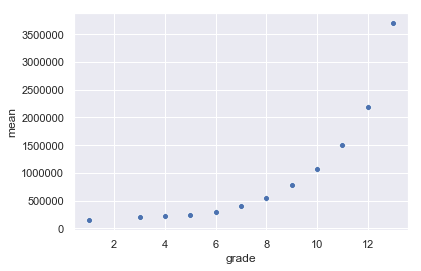

In [104]:
sns.scatterplot(data.index, data['price']['mean'])

In [105]:
# Let's fetch different insights on Total sales for "zipcodes" 
aggregations = {'price': [np.mean, sum, len]}
columns_to_aggregate = [k for k in aggregations.keys()]
cm = sns.light_palette("green", as_cmap=True)
data = pd.pivot_table(houses, values=columns_to_aggregate, index='zipcode', 
               aggfunc=aggregations)
data.style.background_gradient(cmap=cm)

# [B] Clustering

In [106]:
#deleted derived columns
houses = houses.drop(['year_month', 'year', 'month', 'day_of_month', 'day', 'location_zone'], axis=1)

#Since sqft_living = sqft_above + sqft_basement, we are removing it from further processing
houses = houses.drop(['sqft_living'], axis=1)

In [107]:
X = houses.drop(['zipcode', 'date'], axis=1)
X = X.apply(zscore)
Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(21612, 4)

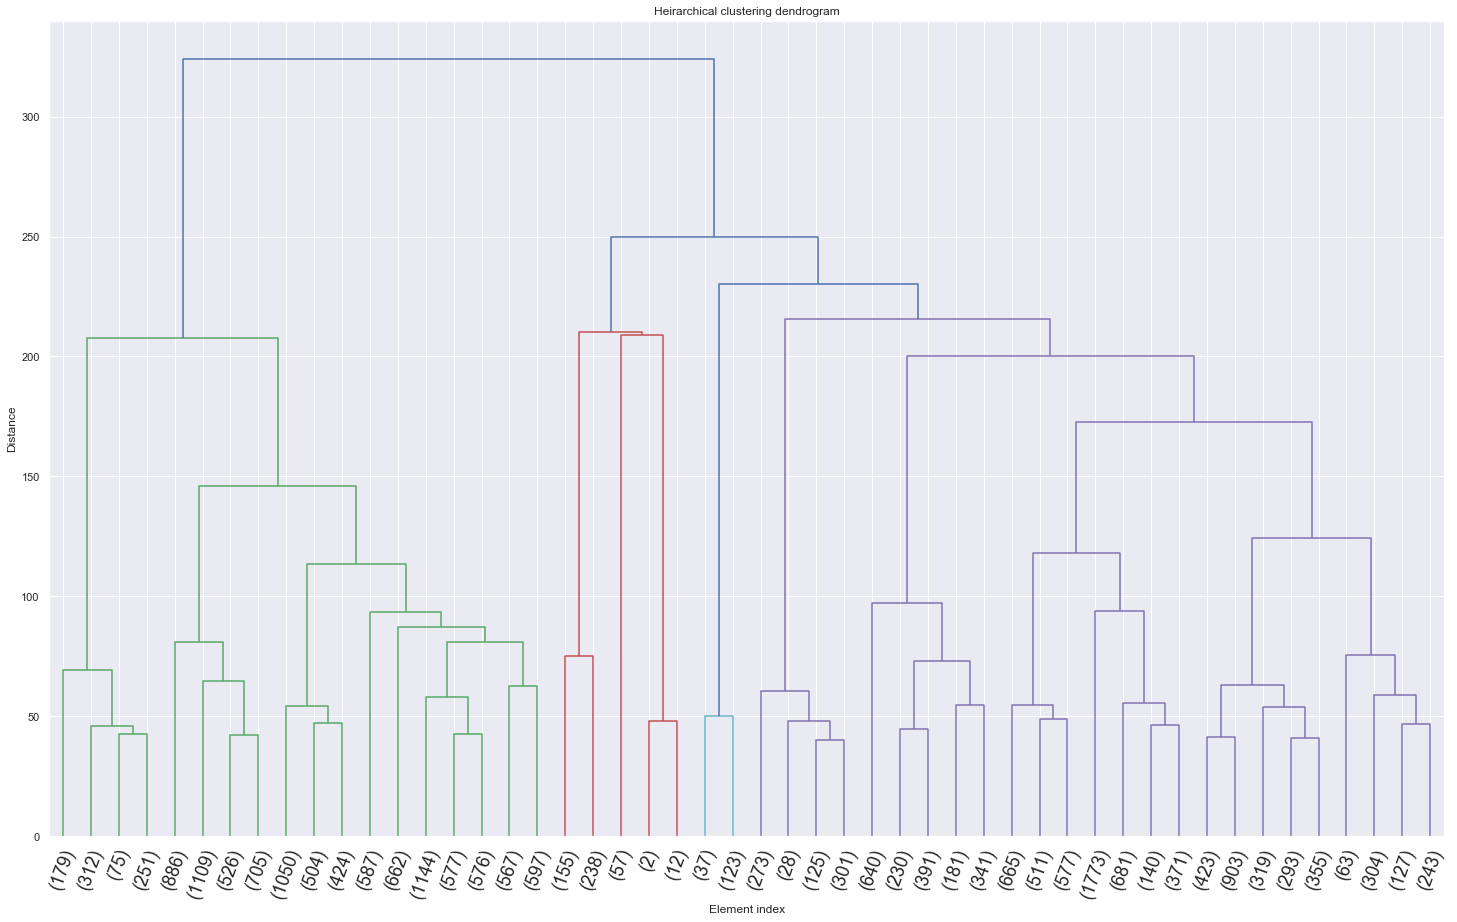

In [108]:
plt.figure(figsize=(25,15))
plt.title('Heirarchical clustering dendrogram')
plt.xlabel("Element index")
plt.ylabel("Distance")
dendrogram(Z, 
           distance_sort=False,    
           leaf_rotation=70,  # rotates the x axis labels
           leaf_font_size=18,  # font size for the x axis labels
           truncate_mode='lastp', 
           p=50
          
        )
plt.show()
plt.close()

In [109]:
optimal_distance = 240

In [110]:
clusters = fcluster(Z, optimal_distance, criterion='distance')

In [111]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{1: 10731, 2: 464, 3: 10418}

In [112]:
house_clusters = houses.copy()
house_clusters['cluster'] = clusters

In [113]:
cluster1= house_clusters[house_clusters['cluster']==1]
cluster2= house_clusters[house_clusters['cluster']==2]
cluster3= house_clusters[house_clusters['cluster']==3]

cluster1.to_csv("cluster1.csv", index=False)
cluster2.to_csv("cluster2.csv", index=False)
cluster3.to_csv("cluster3.csv", index=False)

In [114]:
clustered_houses = houses.copy()
clustered_houses['cluster'] = clusters
clustered_houses = pd.get_dummies(clustered_houses, columns=['cluster'], drop_first=True)
clustered_houses.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2,cluster_2,cluster_3
0,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,7.073270,...,-122.257,7.200425,5650,0,0,0,0,0,0,0
1,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,7.682482,...,-122.319,7.432484,7639,0,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,6.646391,...,-122.233,7.908387,8062,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,6.956545,...,-122.393,7.215240,5000,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,7.426549,...,-122.045,7.495542,7503,0,0,0,0,0,0,1


# [C] Model Building & Tuning

In [115]:
scoring = ['r2', 'neg_mean_absolute_error', 'explained_variance']
seed = 1

In [116]:
def test_model(model, name, desc, X, y, cv, result):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    #print(scores)
    data = {'Model': name, 
            'Details': desc, 
             'R2_Train': scores['train_r2'].mean(),
             'R2_Test': scores['test_r2'].mean(),
             'Var_Train': np.var(scores['train_r2']),
             'Var_Test': np.var(scores['test_r2']),
             'EV_Train': scores['train_explained_variance'].mean(),
             'EV_Test': scores['test_explained_variance'].mean(),
             'MSE_Train': scores['train_neg_mean_absolute_error'].mean(),
             'MSE_Test': scores['test_neg_mean_absolute_error'].mean()
           }
    return result.append(data, ignore_index=True)

In [117]:
result = pd.DataFrame(columns=['Model', 'Details', 'R2_Train', 'R2_Test', 'Var_Train', 'Var_Test', 'EV_Train', 'EV_Test',  'MSE_Train', 'MSE_Test'])
result_poly = pd.DataFrame(columns=['Model', 'Details', 'R2_Train', 'R2_Test', 'Var_Train', 'Var_Test', 'EV_Train', 'EV_Test',  'MSE_Train', 'MSE_Test'])
model_num = 1
cv = 5

# Cluster=1

In [118]:
cluster = 'Cluster=1'
c = cluster1.drop(['date', 'cluster', 'zipcode'], axis=1)

In [119]:
c.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2
0,221900.0,3,1.00,1.0,0,0,3,7,7.073270,0,...,0,47.5112,-122.257,7.200425,5650,0,0,0,0,0
1,538000.0,3,2.25,2.0,0,0,3,7,7.682482,400,...,1991,47.7210,-122.319,7.432484,7639,0,0,0,0,0
2,180000.0,2,1.00,1.0,0,0,3,6,6.646391,0,...,0,47.7379,-122.233,7.908387,8062,0,0,0,0,0
3,604000.0,4,3.00,1.0,0,0,5,7,6.956545,910,...,0,47.5208,-122.393,7.215240,5000,0,0,0,0,0
7,291850.0,3,1.50,1.0,0,0,3,7,6.966024,0,...,0,47.4095,-122.315,7.408531,9711,0,0,0,0,0


In [120]:
c.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.584769
sqft_living15               0.499794
sqft_above                  0.460390
lat                         0.426876
bathrooms                   0.424044
floors                      0.380573
sqft_basement               0.353074
yr_renovated                0.325166
view                        0.293762
bedrooms                    0.261332
sqft_lot_category_big       0.229151
condition                   0.107767
sqft_lot15                 -0.040588
long                       -0.129595
yr_built                   -0.244107
waterfront                       NaN
sqft_lot_category_huge1          NaN
sqft_lot_category_huge2          NaN
sqft_lot_category_giant1         NaN
sqft_lot_category_giant2         NaN
Name: price, dtype: float64

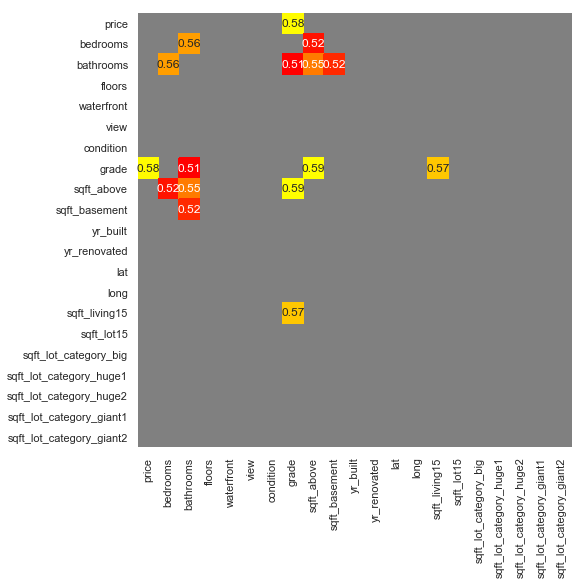

In [121]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.5) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [122]:
y = c['price']
features = ['grade', 'sqft_living15', 'sqft_above', 'lat', 'bathrooms', 'floors', 'sqft_basement', 'yr_renovated', 'view', 'bedrooms', 'sqft_lot_category_big', 'condition', 'long', 'yr_built']
X = c[features]
X_Std = X.apply(zscore)

In [123]:
# Cluster=1

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
result

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531


In [124]:
poly2 = PolynomialFeatures(degree=2)

X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,0.734626,0.000006,0.000111,0.755345,0.734715,-83229.231723,-85306.401334


# Cluster=2


In [125]:
cluster = 'Cluster=2'
c = cluster2.drop(['date', 'cluster', 'zipcode'], axis=1)

In [126]:
c.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2
5,1225000.0,4,4.50,1.0,0,0,3,11,8.266164,1530,...,0,47.6561,-122.005,8.468003,101930,0,0,1,0,0
102,699950.0,3,2.25,2.0,0,0,4,8,7.691657,0,...,0,47.7731,-122.080,7.851661,47777,0,0,1,0,0
132,784000.0,3,3.50,1.5,0,0,3,9,7.807917,1490,...,0,47.6970,-122.072,7.816014,88500,0,0,1,0,0
145,921500.0,4,2.50,2.0,0,0,4,9,8.207947,0,...,0,47.7421,-122.026,7.951559,87991,0,0,0,1,0
199,385000.0,3,1.75,1.0,0,0,4,7,7.207860,0,...,0,47.4058,-121.994,7.352441,50965,0,0,1,0,0


In [127]:
c.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.788082
sqft_above                  0.727783
bathrooms                   0.726879
sqft_living15               0.482379
floors                      0.462938
yr_built                    0.425028
bedrooms                    0.390683
lat                         0.316751
sqft_basement               0.205638
long                        0.130931
sqft_lot_category_giant2    0.129906
view                        0.129679
sqft_lot_category_giant1    0.049190
waterfront                  0.042386
sqft_lot15                  0.027014
yr_renovated               -0.085262
condition                  -0.097474
sqft_lot_category_huge2    -0.106579
sqft_lot_category_big            NaN
sqft_lot_category_huge1          NaN
Name: price, dtype: float64

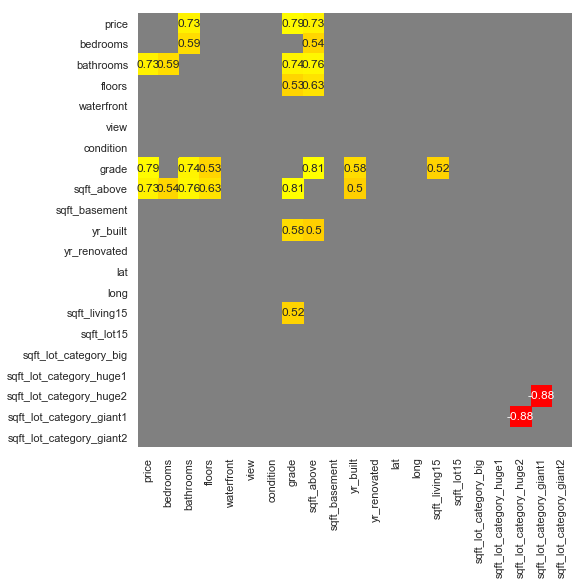

In [128]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.5) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [129]:
y = c['price']
features = ['grade', 'sqft_living15', 'floors', 'yr_built', 'bedrooms', 'lat', 'sqft_basement', 'long', 'sqft_lot_category_giant2', 'view', 'sqft_lot_category_huge2']
X = c[features]
X_Std = X.apply(zscore)

In [130]:
# Cluster=2

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
result


,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.363169e-06,0.001410,0.963250,0.711622,-47430.586423,-132140.301977


In [131]:
poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,7.346260e-01,0.000006,1.106190e-04,0.755345,7.347148e-01,-83229.231723,-8.530640e+04
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.542552e+21,0.000030,1.712200e+44,0.831194,-6.456010e+21,-106851.041350,-3.032734e+15


# Cluster=3

In [132]:
cluster = 'Cluster=3'
c = cluster3.drop(['date', 'cluster', 'zipcode'], axis=1)

In [133]:
c.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2
4,510000.0,3,2.00,1.0,0,0,3,8,7.426549,0,...,0,47.6168,-122.045,7.495542,7503,0,0,0,0,0
6,257500.0,3,2.25,2.0,0,0,3,7,7.447168,0,...,0,47.3097,-122.327,7.713338,6819,0,0,0,0,0
9,323000.0,3,2.50,2.0,0,0,3,7,7.544332,0,...,0,47.3684,-122.031,7.779049,7570,0,0,0,0,0
12,310000.0,3,1.00,1.5,0,0,4,7,7.265430,0,...,0,47.7558,-122.229,7.484369,12697,1,0,0,0,0
15,650000.0,4,3.00,2.0,0,3,3,9,7.590852,970,...,0,47.5714,-122.375,7.668561,4000,0,0,0,0,0


In [134]:
c.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.666228
bathrooms                   0.526084
sqft_above                  0.518924
sqft_living15               0.509365
view                        0.432472
sqft_basement               0.417228
bedrooms                    0.329282
lat                         0.306185
waterfront                  0.293423
condition                   0.162448
yr_renovated                0.130403
sqft_lot_category_big       0.101855
sqft_lot15                  0.056526
floors                      0.032150
sqft_lot_category_huge1     0.025173
sqft_lot_category_huge2    -0.003144
long                       -0.098739
yr_built                   -0.125316
sqft_lot_category_giant1         NaN
sqft_lot_category_giant2         NaN
Name: price, dtype: float64

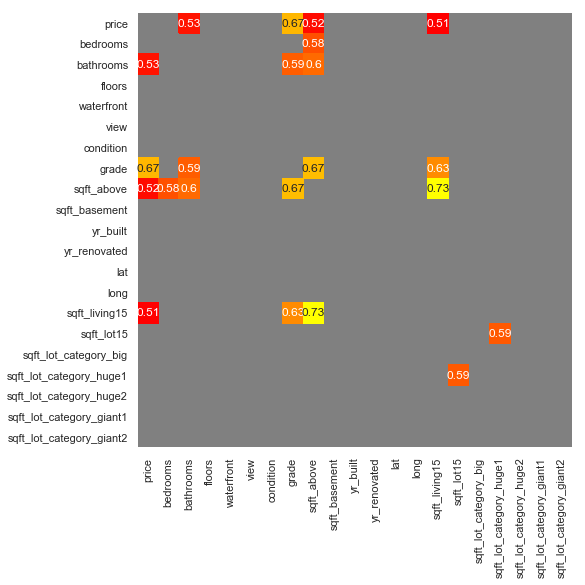

In [135]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.5) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [136]:
y = c['price']
features = ['grade', 'bathrooms', 'sqft_above', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'condition', 'yr_renovated', 'sqft_lot_category_big', 'yr_built']
X = c[features]
X_Std = X.apply(zscore)

In [137]:
# Cluster=3

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
result

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.363169e-06,0.001410,0.963250,0.711622,-47430.586423,-132140.301977
6,Cluster=3-->LinearRegression-9,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
7,Cluster=3-->LinearRegression-10,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
8,Cluster=3-->RandomForestRegressor-11,R > 0.2,0.975080,0.807253,5.826387e-07,0.000321,0.975080,0.807354,-35960.429439,-98791.929206


In [138]:
poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,7.346260e-01,0.000006,1.106190e-04,0.755345,7.347148e-01,-83229.231723,-8.530640e+04
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.542552e+21,0.000030,1.712200e+44,0.831194,-6.456010e+21,-106851.041350,-3.032734e+15
2,Cluster=3-->PolynomialFeatures-12,"R > 0.1, Scaled, 2nd Degree Polynomial",0.797895,7.712961e-01,0.000025,5.946518e-04,0.797895,7.714227e-01,-120497.343142,-1.243646e+05


# All Data - Without Clustering, With Transformation

In [139]:
cluster = 'All Data - w/o clustering, with transformation'
c = houses.drop(['date', 'zipcode'], axis=1)

In [140]:
c.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2
0,221900.0,3,1.00,1.0,0,0,3,7,7.073270,0,...,0,47.5112,-122.257,7.200425,5650,0,0,0,0,0
1,538000.0,3,2.25,2.0,0,0,3,7,7.682482,400,...,1991,47.7210,-122.319,7.432484,7639,0,0,0,0,0
2,180000.0,2,1.00,1.0,0,0,3,6,6.646391,0,...,0,47.7379,-122.233,7.908387,8062,0,0,0,0,0
3,604000.0,4,3.00,1.0,0,0,5,7,6.956545,910,...,0,47.5208,-122.393,7.215240,5000,0,0,0,0,0
4,510000.0,3,2.00,1.0,0,0,3,8,7.426549,0,...,0,47.6168,-122.045,7.495542,7503,0,0,0,0,0


In [141]:
c.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.667434
sqft_living15               0.543988
sqft_above                  0.542734
bathrooms                   0.525138
view                        0.397293
sqft_basement               0.323816
bedrooms                    0.315438
lat                         0.307003
waterfront                  0.266369
floors                      0.256794
sqft_lot_category_big       0.175859
yr_renovated                0.126434
sqft_lot15                  0.082447
sqft_lot_category_huge1     0.067233
yr_built                    0.054012
sqft_lot_category_huge2     0.043616
condition                   0.036362
sqft_lot_category_giant2    0.027490
sqft_lot_category_giant1    0.025345
long                        0.021626
Name: price, dtype: float64

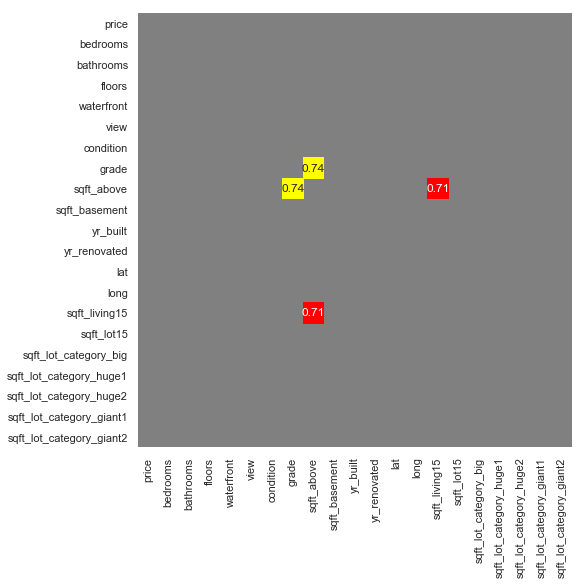

In [142]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.7) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [143]:
y = c['price']
features = ['grade', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'sqft_lot_category_big', 'yr_renovated']
X = c[features]
X_Std = X.apply(zscore)

In [144]:
# All Data - Without Clustering

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
result

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.363169e-06,0.001410,0.963250,0.711622,-47430.586423,-132140.301977
6,Cluster=3-->LinearRegression-9,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
7,Cluster=3-->LinearRegression-10,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
8,Cluster=3-->RandomForestRegressor-11,R > 0.2,0.975080,0.807253,5.826387e-07,0.000321,0.975080,0.807354,-35960.429439,-98791.929206
9,"All Data - w/o clustering, with transformation...",R > 0.1,0.615375,0.611880,1.389000e-05,0.000195,0.615375,0.612152,-141606.455998,-142143.753110


In [145]:
poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,7.346260e-01,0.000006,1.106190e-04,0.755345,7.347148e-01,-83229.231723,-8.530640e+04
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.542552e+21,0.000030,1.712200e+44,0.831194,-6.456010e+21,-106851.041350,-3.032734e+15
2,Cluster=3-->PolynomialFeatures-12,"R > 0.1, Scaled, 2nd Degree Polynomial",0.797895,7.712961e-01,0.000025,5.946518e-04,0.797895,7.714227e-01,-120497.343142,-1.243646e+05
3,"All Data - w/o clustering, with transformation...","R > 0.1, Scaled, 2nd Degree Polynomial",0.739478,7.242253e-01,0.000003,5.645904e-05,0.739478,7.243051e-01,-118349.199720,-1.199225e+05


# All Data - Without Clustering - Without Transformation

In [146]:
cluster = 'All Data - w/o clustering, w/o transformation'
file = "kc_house_data.csv"
c = pd.read_csv(file, parse_dates=['date']).drop(['date', 'zipcode'], axis=1)

In [147]:
c.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [148]:
c.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
Name: price, dtype: float64

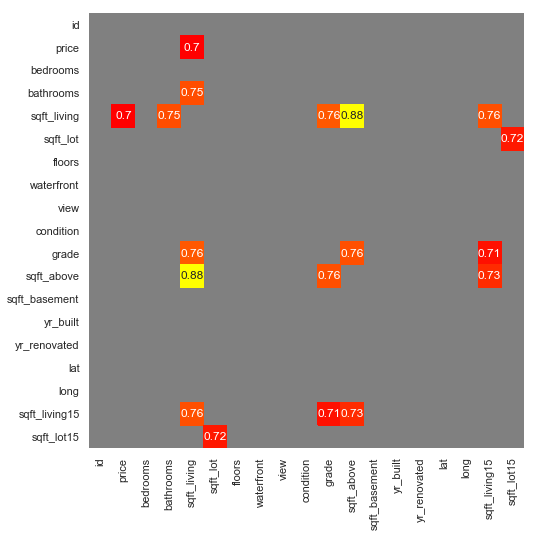

In [149]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.7) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [150]:
y = c['price']
features = ['sqft_living', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated']
X = c[features]
X_Std = X.apply(zscore)

In [151]:
# All Data - Without Clustering - Without Transformation

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
#result

poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result)
model_num += 1
result

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.363169e-06,0.001410,0.963250,0.711622,-47430.586423,-132140.301977
6,Cluster=3-->LinearRegression-9,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
7,Cluster=3-->LinearRegression-10,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
8,Cluster=3-->RandomForestRegressor-11,R > 0.2,0.975080,0.807253,5.826387e-07,0.000321,0.975080,0.807354,-35960.429439,-98791.929206
9,"All Data - w/o clustering, with transformation...",R > 0.1,0.615375,0.611880,1.389000e-05,0.000195,0.615375,0.612152,-141606.455998,-142143.753110


In [152]:
poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,7.346260e-01,0.000006,1.106190e-04,0.755345,7.347148e-01,-83229.231723,-8.530640e+04
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.542552e+21,0.000030,1.712200e+44,0.831194,-6.456010e+21,-106851.041350,-3.032734e+15
2,Cluster=3-->PolynomialFeatures-12,"R > 0.1, Scaled, 2nd Degree Polynomial",0.797895,7.712961e-01,0.000025,5.946518e-04,0.797895,7.714227e-01,-120497.343142,-1.243646e+05
3,"All Data - w/o clustering, with transformation...","R > 0.1, Scaled, 2nd Degree Polynomial",0.739478,7.242253e-01,0.000003,5.645904e-05,0.739478,7.243051e-01,-118349.199720,-1.199225e+05
4,"All Data - w/o clustering, w/o transformation-...","R > 0.1, Scaled, 2nd Degree Polynomial",0.706645,6.839764e-01,0.000052,1.492091e-03,0.706645,6.840048e-01,-124368.853963,-1.253480e+05


# All Clustered Data

In [153]:
cluster = 'All Clutered Data, with transformation'
c = clustered_houses.drop(['date', 'zipcode'], axis=1)

In [154]:
c.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,sqft_lot_category_big,sqft_lot_category_huge1,sqft_lot_category_huge2,sqft_lot_category_giant1,sqft_lot_category_giant2,cluster_2,cluster_3
0,221900.0,3,1.00,1.0,0,0,3,7,7.073270,0,...,-122.257,7.200425,5650,0,0,0,0,0,0,0
1,538000.0,3,2.25,2.0,0,0,3,7,7.682482,400,...,-122.319,7.432484,7639,0,0,0,0,0,0,0
2,180000.0,2,1.00,1.0,0,0,3,6,6.646391,0,...,-122.233,7.908387,8062,0,0,0,0,0,0,0
3,604000.0,4,3.00,1.0,0,0,5,7,6.956545,910,...,-122.393,7.215240,5000,0,0,0,0,0,0,0
4,510000.0,3,2.00,1.0,0,0,3,8,7.426549,0,...,-122.045,7.495542,7503,0,0,0,0,0,0,1


In [155]:
c.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.667434
sqft_living15               0.543988
sqft_above                  0.542734
bathrooms                   0.525138
view                        0.397293
sqft_basement               0.323816
bedrooms                    0.315438
lat                         0.307003
waterfront                  0.266369
floors                      0.256794
cluster_3                   0.237885
sqft_lot_category_big       0.175859
yr_renovated                0.126434
sqft_lot15                  0.082447
sqft_lot_category_huge1     0.067233
cluster_2                   0.054120
yr_built                    0.054012
sqft_lot_category_huge2     0.043616
condition                   0.036362
sqft_lot_category_giant2    0.027490
sqft_lot_category_giant1    0.025345
long                        0.021626
Name: price, dtype: float64

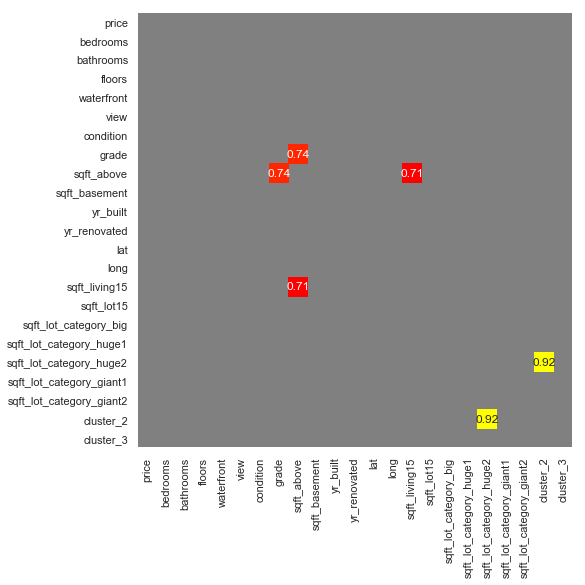

In [156]:
corr  = c.corr()
corr1 = corr[((np.abs(corr) > 0.7) & (corr != 1))]

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'
sns.heatmap(corr1 ,square=True, annot=True, cmap='autumn', cbar=False )
plt.show()
plt.close()

In [157]:
y = c['price']
features = ['grade', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'cluster_3', 'sqft_lot_category_big', 'yr_renovated']
X = c[features]
X_Std = X.apply(zscore)

In [158]:
# All Clustered Data

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), "R > 0.1", X, y, cv, result)
model_num += 1
#result

model_lr = LinearRegression()
result = test_model(model_lr, "{}-->{}-{}".format(cluster, model_lr.__class__.__name__, model_num), 
                    "R > 0.1", X_Std, y, cv, result)
model_num += 1
#result

model_rf=RandomForestRegressor(n_estimators=100, random_state=seed)
result = test_model(model_rf, "{}-->{}-{}".format(cluster, model_rf.__class__.__name__, model_num),
                        "R > 0.2", X_Std, y, cv, result)
model_num += 1
result

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.112495e-06,0.000052,0.652469,0.650633,-97653.060442,-97782.476681
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.613945e-07,0.000221,0.975362,0.836162,-23482.152617,-60655.343531
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.026728e-05,0.000178,0.697468,0.677692,-141824.817823,-146263.717429
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.363169e-06,0.001410,0.963250,0.711622,-47430.586423,-132140.301977
6,Cluster=3-->LinearRegression-9,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
7,Cluster=3-->LinearRegression-10,R > 0.1,0.672036,0.663280,2.056616e-05,0.000399,0.672036,0.669424,-154201.458391,-156327.859608
8,Cluster=3-->RandomForestRegressor-11,R > 0.2,0.975080,0.807253,5.826387e-07,0.000321,0.975080,0.807354,-35960.429439,-98791.929206
9,"All Data - w/o clustering, with transformation...",R > 0.1,0.615375,0.611880,1.389000e-05,0.000195,0.615375,0.612152,-141606.455998,-142143.753110


In [159]:
poly2 = PolynomialFeatures(degree=2)
X_Poly = pd.DataFrame(poly2.fit_transform(X_Std))
result_poly = test_model(model_lr, 
                    "{}-->{}-{}".format(cluster, poly2.__class__.__name__, model_num), 
                    "R > 0.1, Scaled, 2nd Degree Polynomial", X_Poly, y, cv, result_poly)
model_num += 1
result_poly

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,7.346260e-01,0.000006,1.106190e-04,0.755345,7.347148e-01,-83229.231723,-8.530640e+04
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.542552e+21,0.000030,1.712200e+44,0.831194,-6.456010e+21,-106851.041350,-3.032734e+15
2,Cluster=3-->PolynomialFeatures-12,"R > 0.1, Scaled, 2nd Degree Polynomial",0.797895,7.712961e-01,0.000025,5.946518e-04,0.797895,7.714227e-01,-120497.343142,-1.243646e+05
3,"All Data - w/o clustering, with transformation...","R > 0.1, Scaled, 2nd Degree Polynomial",0.739478,7.242253e-01,0.000003,5.645904e-05,0.739478,7.243051e-01,-118349.199720,-1.199225e+05
4,"All Data - w/o clustering, w/o transformation-...","R > 0.1, Scaled, 2nd Degree Polynomial",0.706645,6.839764e-01,0.000052,1.492091e-03,0.706645,6.840048e-01,-124368.853963,-1.253480e+05
5,"All Clutered Data, with transformation-->Polyn...","R > 0.1, Scaled, 2nd Degree Polynomial",0.744008,-9.535921e+19,0.000005,3.637351e+40,0.744008,-9.533715e+19,-116389.197244,-2.585089e+13


In [160]:
result.style.background_gradient(axis=0)

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->LinearRegression-1,R > 0.1,0.652469,0.650438,3.11249e-06,5.24644e-05,0.652469,0.650633,-97653.1,-97782.5
1,Cluster=1-->LinearRegression-2,R > 0.1,0.652469,0.650438,3.11249e-06,5.24644e-05,0.652469,0.650633,-97653.1,-97782.5
2,Cluster=1-->RandomForestRegressor-3,R > 0.2,0.975362,0.836047,6.61395e-07,0.000221198,0.975362,0.836162,-23482.2,-60655.3
3,Cluster=2-->LinearRegression-5,R > 0.1,0.697468,0.674812,1.02673e-05,0.00017764,0.697468,0.677692,-141825,-146264
4,Cluster=2-->LinearRegression-6,R > 0.1,0.697468,0.674812,1.02673e-05,0.00017764,0.697468,0.677692,-141825,-146264
5,Cluster=2-->RandomForestRegressor-7,R > 0.2,0.963243,0.710218,4.36317e-06,0.0014099,0.96325,0.711622,-47430.6,-132140
6,Cluster=3-->LinearRegression-9,R > 0.1,0.672036,0.66328,2.05662e-05,0.000398747,0.672036,0.669424,-154201,-156328
7,Cluster=3-->LinearRegression-10,R > 0.1,0.672036,0.66328,2.05662e-05,0.000398747,0.672036,0.669424,-154201,-156328
8,Cluster=3-->RandomForestRegressor-11,R > 0.2,0.97508,0.807253,5.82639e-07,0.000320724,0.97508,0.807354,-35960.4,-98791.9
9,"All Data - w/o clustering, with transformation-->LinearRegression-13",R > 0.1,0.615375,0.61188,1.389e-05,0.000195013,0.615375,0.612152,-141606,-142144


In [161]:
result_poly.style.background_gradient(axis=0)

,Model,Details,R2_Train,R2_Test,Var_Train,Var_Test,EV_Train,EV_Test,MSE_Train,MSE_Test
0,Cluster=1-->PolynomialFeatures-4,"R > 0.1, Scaled, 2nd Degree Polynomial",0.755345,0.734626,6.25766e-06,0.000110619,0.755345,0.734715,-83229.2,-85306.4
1,Cluster=2-->PolynomialFeatures-8,"R > 0.1, Scaled, 2nd Degree Polynomial",0.831193,-6.54255e+21,3.03661e-05,1.7122e+44,0.831194,-6.45601e+21,-106851,-3.03273e+15
2,Cluster=3-->PolynomialFeatures-12,"R > 0.1, Scaled, 2nd Degree Polynomial",0.797895,0.771296,2.52355e-05,0.000594652,0.797895,0.771423,-120497,-124365
3,"All Data - w/o clustering, with transformation-->PolynomialFeatures-16","R > 0.1, Scaled, 2nd Degree Polynomial",0.739478,0.724225,3.36009e-06,5.6459e-05,0.739478,0.724305,-118349,-119923
4,"All Data - w/o clustering, w/o transformation-->PolynomialFeatures-21","R > 0.1, Scaled, 2nd Degree Polynomial",0.706645,0.683976,5.20693e-05,0.00149209,0.706645,0.684005,-124369,-125348
5,"All Clutered Data, with transformation-->PolynomialFeatures-25","R > 0.1, Scaled, 2nd Degree Polynomial",0.744008,-9.53592e+19,5.18101e-06,3.63735e+40,0.744008,-9.53371e+19,-116389,-2.58509e+13
